<a href="https://colab.research.google.com/github/naomifridman/DL_utils/blob/master/predict_alert1_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gc
gc.collect()

0

In [0]:
import numpy as np
import pandas as pd
import re
import datetime as dt
from os import listdir
from os.path import isfile, join
import matplotlib.gridspec as gridspec
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
from IPython.display import display, Markdown, Latex

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Seaborn for visualization
import seaborn as sns
#sns.set(font_scale = 2)

from sklearn.utils import shuffle

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from pandas import read_csv, get_dummies
from matplotlib.pyplot import figure
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import warnings
import random

warnings.filterwarnings('ignore')
%matplotlib inline

## Build time series generator

In [0]:
def get_next_legit(ind, df):
    tmp = df[ind+1:]
    #print(len(tmp[tmp['legit']>0]))
    if(len(tmp[tmp['legit']>0])==0):
        return 0
    return tmp[tmp['legit']>0].index[0]
    
    

### legit lags:
* mark last legit : 2
* first legit: 1

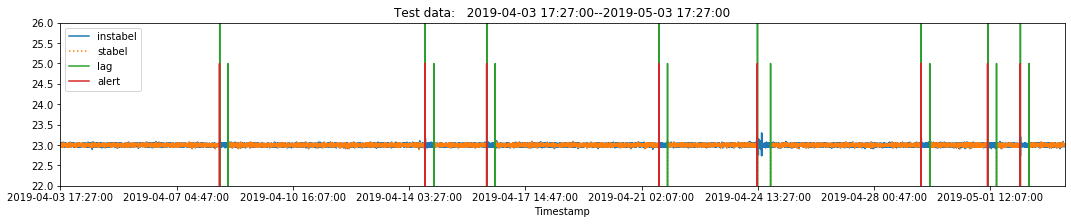

In [0]:
plt.figure(figsize=(18,3))
df_t = df_all.set_index(['Timestamp'])
df_all.set_index(['Timestamp']).loc[t:endt]['F28_SEL201_1_00A.OUT_c'].plot(ylim=(22,26), rot=45)
(df_all.set_index(['Timestamp']).loc[t:endt]['F28_SEL201_1_00A.OUT_c']*df_all.set_index(['Timestamp']).loc[t:endt]['legit']).plot(ylim=(22,26), 
                                                                                                                          rot=45,linestyle=':')
(df_all.set_index(['Timestamp']).loc[t:endt]['legit_lag']*25).plot(ylim=(22,26), rot=45)                                
(df_all.set_index(['Timestamp']).loc[t:endt]['alert']*25).plot(alpha=1, lw=1.5, title='Test data:   '+ t +'--'+endt)
plt.legend(['instabel','stabel','lag','alert'])

#### correct head and tail values

## save and load

In [0]:
from google.colab import files

uploaded = files.upload()

In [0]:
df_train1=pd.read_csv('df_train_1.csv')
df_train2=pd.read_csv('df_train_2.csv')
df_test1=pd.read_csv('df_test_1.csv')
df_test2=pd.read_csv('df_test_1.csv')

In [4]:
from google.colab import drive
PATH = '/content/gdrive/My Drive/' + 'Intel/'

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df=read_csv(PATH+'df_all_with_alert3.csv', nrows=120000, skiprows=400000, header= 0)

In [195]:
df.head()

,2017-07-17 17:26:00,1.8460898399,4.3355345726,29.327011108,54.973258971999996,27.624782561999996,54.997108458999996,73.86144256600001,76.592956543,22.997020721,22.999731064000002,3.1959810257,2.9923038482999997,0.0,0.0.1,27.625610352,16.0,76.039497375,51.220458984,24.822467804000002,22.503381729,22.413663864,22.592418671,17.0,871.73822021,196.49476624,420.0541687,38.440872192,38.379024506,2103.6342772999997,61.08731079100001,10.0,1.0,27.750566483000004,27.865930557,25.111450195,91.261421204,985.61798096,40.620574951,72.02613067600001,0,0.1,0.04166666666666666,0.2,0.3,31.405555725000006,0.061847686000000124,2.4894447327,0.5334777609407763,0.9998821576220843,0.20367717740000035,0.0.2,43.625610351999995,-0.08971786500000078,0.9960131385548874,0.9960131385548874.1
0,2017-07-17 17:27:00,1.846090,4.335535,29.327011,54.973259,27.624783,54.997108,73.861443,76.592957,22.997021,22.999731,3.195981,2.992304,0.0,0.0,27.625610,16.0,76.039497,51.220459,24.822468,22.503382,22.413664,22.592419,17.0,871.73822,196.494766,420.054169,38.440872,38.379025,2103.634277,61.087311,10.0,1.0,27.750566,27.865931,25.111450,91.261421,985.617981,40.620575,72.026131,0,0,0.041667,0,0,31.405556,0.061848,2.489445,0.533478,0.999882,0.203677,0.0,43.625610,-0.089718,0.996013,0.996013
1,2017-07-17 17:28:00,1.846090,4.335535,29.327011,54.973259,27.624783,54.997108,73.861443,76.592957,22.997021,22.999731,3.195981,2.992304,0.0,0.0,27.625610,16.0,76.039497,51.220459,24.822468,22.503382,22.413664,22.592419,17.0,871.73822,196.494766,420.054169,38.440872,38.379025,2103.634277,61.087311,10.0,1.0,27.750566,27.865931,25.111450,91.261421,985.617981,40.620575,72.026131,0,0,0.041667,0,0,31.405556,0.061848,2.489445,0.533478,0.999882,0.203677,0.0,43.625610,-0.089718,0.996013,0.996013
2,2017-07-17 17:29:00,1.846090,4.335535,29.327011,54.973259,27.624783,54.997108,73.861443,76.592957,22.997021,22.999731,3.195981,2.992304,0.0,0.0,27.625610,16.0,76.039497,51.220459,24.822468,22.503382,22.413664,22.592419,17.0,871.73822,196.494766,420.054169,38.440872,38.379025,2103.634277,61.087311,10.0,1.0,27.750566,27.865931,25.111450,91.261421,985.617981,40.620575,72.026131,0,0,0.041667,0,0,31.405556,0.061848,2.489445,0.533478,0.999882,0.203677,0.0,43.625610,-0.089718,0.996013,0.996013
3,2017-07-17 17:30:00,1.851279,4.334948,28.388756,55.001980,27.731749,55.016743,73.854065,76.589821,22.985321,23.000946,3.806983,2.918730,0.0,0.0,27.731977,16.0,75.947388,51.220867,24.723230,22.504364,22.412130,22.411036,17.0,864.05658,195.479019,416.638641,38.435860,38.380520,2232.396484,61.157272,10.0,1.0,27.604622,27.714577,24.559669,90.990707,994.810730,40.656368,72.181000,0,0,0.041667,0,0,31.524632,0.055340,2.483669,0.516141,0.999321,0.888253,0.0,43.731977,-0.092234,0.995902,0.995902
4,2017-07-17 17:31:00,1.851279,4.334948,28.388756,55.001980,27.731749,55.016743,73.854065,76.589821,22.985321,23.000946,3.806983,2.918730,0.0,0.0,27.731977,16.0,75.947388,51.220867,24.723230,22.504364,22.412130,22.411036,17.0,864.05658,195.479019,416.638641,38.435860,38.380520,2232.396484,61.157272,10.0,1.0,27.604622,27.714577,24.559669,90.990707,994.810730,40.656368,72.181000,0,0,0.041667,0,0,31.524632,0.055340,2.483669,0.516141,0.999321,0.888253,0.0,43.731977,-0.092234,0.995902,0.995902


In [0]:
df.columns=['Timestamp', 'F28_PIC201_1_00A_STD1D', 'F28_PIC201_2_00A_STD1D',
       'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV', 'F28_TIC201_1_30A.CO',
       'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A', 'F28_PIT201_2_20A',
       'F28_SEL201_1_00A.OUT', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B', 'LCC2_FIC111_0_03A.PV',
       'LCC2_PMP111_13_00.IO.SI', 'LCC2_QY111_1_10A.DMD',
       'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A', 'LCC2_PDIT112_0_00B',
       'LCC2_TIC111_0_11A.PV', 'LC12_TI650_0_03A', 'LC12_PI650_0_04A',
       'LC12_NY650_0_03A', 'LC12_NY650_0_03B', 'label', 'start_label',
       'lab_mv', 'legit', 'alert', 'LC12_NY650_0_03B_A', 'LCC2_TET112_0_06A_B',
       'F28_PIC201_2_1_00A_STD1D', 'F28_TIC201_2_30A_CO_PV',
       'F28_SEL201_1_2_00A_OUT', 'F28_PCV201_1_00A_B', 'F28_PCV201_2_1_01C',
       'F28_TCV201_1_30B_A', 'F28_PDIT112_0_09A_B', 'tmp',
       'F28_PDIT112_0_09BdivB']

In [0]:
df=df[['Timestamp', 'F28_PIC201_1_00A_STD1D', 'F28_PIC201_2_00A_STD1D',
       'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV', 'F28_TIC201_1_30A.CO',
       'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A', 'F28_PIT201_2_20A',
       'F28_SEL201_1_00A.OUT', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B', 'LCC2_FIC111_0_03A.PV',
       'LCC2_PMP111_13_00.IO.SI', 'LCC2_QY111_1_10A.DMD',
       'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A', 'LCC2_PDIT112_0_00B',
       'LCC2_TIC111_0_11A.PV', 'LC12_TI650_0_03A', 'LC12_PI650_0_04A',
       'LC12_NY650_0_03A', 'LC12_NY650_0_03B', 
        'LC12_NY650_0_03B_A', 'LCC2_TET112_0_06A_B',
       'F28_PIC201_2_1_00A_STD1D', 'F28_TIC201_2_30A_CO_PV',
       'F28_SEL201_1_2_00A_OUT', 'F28_PCV201_1_00A_B', 'F28_PCV201_2_1_01C',
       'F28_TCV201_1_30B_A', 'F28_PDIT112_0_09A_B', 
       'F28_PDIT112_0_09BdivB', 'label', 'start_label','lab_mv', 'legit', 'alert']]

In [198]:
df.head()

,Timestamp,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_1_00A.OUT,F28_SEL201_2_00A.OUT,F28_PCV201_1_00A,F28_PCV201_2_00A,F28_PCV201_1_01C,F28_PCV201_2_01C,F28_TCV201_1_30A,F28_TCV201_1_30B,F28_PIT112_0_01A,F28_PIT112_0_02A,F28_PDI112_0_01,F28_PDIT112_0_09A,F28_PDIT112_0_09B,F28_PDIT112_0_09C,F28_TCV101_0_06A,F28_TCV101_0_08A,F28_TCV101_0_10A,F28_NCV101_0_11A,LCC2_TET112_0_06A,LCC2_TET112_0_06B,LCC2_FIC111_0_03A.PV,LCC2_PMP111_13_00.IO.SI,LCC2_QY111_1_10A.DMD,LCC2_QY111_2_10A.DMD,LCC2_PDIT112_0_00A,LCC2_PDIT112_0_00B,LCC2_TIC111_0_11A.PV,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,LC12_NY650_0_03B_A,LCC2_TET112_0_06A_B,F28_PIC201_2_1_00A_STD1D,F28_TIC201_2_30A_CO_PV,F28_SEL201_1_2_00A_OUT,F28_PCV201_1_00A_B,F28_PCV201_2_1_01C,F28_TCV201_1_30B_A,F28_PDIT112_0_09A_B,F28_PDIT112_0_09BdivB,label,start_label,lab_mv,legit,alert
0,2017-07-17 17:27:00,1.846090,4.335535,29.327011,54.973259,27.624783,54.997108,73.861443,76.592957,22.997021,22.999731,3.195981,2.992304,0.0,0.0,27.625610,16.0,76.039497,51.220459,24.822468,22.503382,22.413664,22.592419,17.0,871.73822,196.494766,420.054169,38.440872,38.379025,2103.634277,61.087311,10.0,1.0,27.750566,27.865931,25.111450,91.261421,985.617981,40.620575,72.026131,31.405556,0.061848,2.489445,0.533478,0.999882,0.203677,0.0,43.625610,-0.089718,0.996013,0,0,0.041667,0,0
1,2017-07-17 17:28:00,1.846090,4.335535,29.327011,54.973259,27.624783,54.997108,73.861443,76.592957,22.997021,22.999731,3.195981,2.992304,0.0,0.0,27.625610,16.0,76.039497,51.220459,24.822468,22.503382,22.413664,22.592419,17.0,871.73822,196.494766,420.054169,38.440872,38.379025,2103.634277,61.087311,10.0,1.0,27.750566,27.865931,25.111450,91.261421,985.617981,40.620575,72.026131,31.405556,0.061848,2.489445,0.533478,0.999882,0.203677,0.0,43.625610,-0.089718,0.996013,0,0,0.041667,0,0
2,2017-07-17 17:29:00,1.846090,4.335535,29.327011,54.973259,27.624783,54.997108,73.861443,76.592957,22.997021,22.999731,3.195981,2.992304,0.0,0.0,27.625610,16.0,76.039497,51.220459,24.822468,22.503382,22.413664,22.592419,17.0,871.73822,196.494766,420.054169,38.440872,38.379025,2103.634277,61.087311,10.0,1.0,27.750566,27.865931,25.111450,91.261421,985.617981,40.620575,72.026131,31.405556,0.061848,2.489445,0.533478,0.999882,0.203677,0.0,43.625610,-0.089718,0.996013,0,0,0.041667,0,0
3,2017-07-17 17:30:00,1.851279,4.334948,28.388756,55.001980,27.731749,55.016743,73.854065,76.589821,22.985321,23.000946,3.806983,2.918730,0.0,0.0,27.731977,16.0,75.947388,51.220867,24.723230,22.504364,22.412130,22.411036,17.0,864.05658,195.479019,416.638641,38.435860,38.380520,2232.396484,61.157272,10.0,1.0,27.604622,27.714577,24.559669,90.990707,994.810730,40.656368,72.181000,31.524632,0.055340,2.483669,0.516141,0.999321,0.888253,0.0,43.731977,-0.092234,0.995902,0,0,0.041667,0,0
4,2017-07-17 17:31:00,1.851279,4.334948,28.388756,55.001980,27.731749,55.016743,73.854065,76.589821,22.985321,23.000946,3.806983,2.918730,0.0,0.0,27.731977,16.0,75.947388,51.220867,24.723230,22.504364,22.412130,22.411036,17.0,864.05658,195.479019,416.638641,38.435860,38.380520,2232.396484,61.157272,10.0,1.0,27.604622,27.714577,24.559669,90.990707,994.810730,40.656368,72.181000,31.524632,0.055340,2.483669,0.516141,0.999321,0.888253,0.0,43.731977,-0.092234,0.995902,0,0,0.041667,0,0


In [8]:
alert_df = df[df.start_label>0]
indx=alert_df.index.values
indx[0:4]

array([ 9678, 12453, 13908, 18588])

In [186]:
df.describe()

,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_1_00A.OUT,F28_SEL201_2_00A.OUT,F28_PCV201_1_00A,F28_PCV201_2_00A,F28_PCV201_1_01C,F28_PCV201_2_01C,F28_TCV201_1_30A,F28_TCV201_1_30B,F28_PIT112_0_01A,F28_PIT112_0_02A,F28_PDI112_0_01,F28_PDIT112_0_09A,F28_PDIT112_0_09B,F28_PDIT112_0_09C,F28_TCV101_0_06A,F28_TCV101_0_08A,F28_TCV101_0_10A,F28_NCV101_0_11A,LCC2_TET112_0_06A,LCC2_TET112_0_06B,LCC2_FIC111_0_03A.PV,LCC2_PMP111_13_00.IO.SI,LCC2_QY111_1_10A.DMD,LCC2_QY111_2_10A.DMD,LCC2_PDIT112_0_00A,LCC2_PDIT112_0_00B,LCC2_TIC111_0_11A.PV,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,LC12_NY650_0_03B_A,LCC2_TET112_0_06A_B,F28_PIC201_2_1_00A_STD1D,F28_TIC201_2_30A_CO_PV,F28_SEL201_1_2_00A_OUT,F28_PCV201_1_00A_B,F28_PCV201_2_1_01C,F28_TCV201_1_30B_A,F28_PDIT112_0_09A_B,F28_PDIT112_0_09BdivB,label,start_label,lab_mv,legit,alert
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,2.323849,2.031890,34.381426,54.999936,31.590603,55.000045,73.988135,76.989296,23.006749,23.004373,2.832527,3.205979,0.261147,0.548980,31.590808,16.000149,75.319660,51.120391,24.199247,22.499936,22.419655,22.949964,17.000011,587.464131,207.798064,337.576410,39.010335,38.919258,1781.555298,28.672667,8.520032,1.003952,26.776607,26.872028,22.024670,77.750486,996.120731,33.515713,65.299566,31.783853,0.091077,-0.291960,0.625117,1.000105,-0.373452,-0.287833,47.590957,-0.080281,0.996432,0.026733,0.000525,0.026778,0.732350,0.000525
std,1.175266,1.253357,4.192825,0.019392,4.880269,0.019148,0.090892,0.198442,0.037207,0.032519,3.035880,1.726704,1.806195,6.193532,4.879117,0.001288,1.332794,1.252276,0.529500,0.010443,0.018764,0.341511,0.000295,135.409323,14.298124,52.983423,1.300380,1.295057,938.560847,31.456908,0.651214,0.034050,0.851905,0.857707,2.581009,7.890072,3.204635,3.553136,4.557537,2.393558,0.017114,1.286623,0.076228,0.001786,3.172953,6.124704,4.879412,0.018127,0.000805,0.161304,0.022907,0.103379,0.442736,0.022907
min,0.794146,0.667134,26.092155,54.841114,24.039082,54.872665,71.063339,73.899818,22.675158,22.000000,0.000000,0.000000,0.000000,0.000000,24.038485,16.000000,72.299026,47.942829,21.721790,21.566311,21.476654,21.293503,17.000000,236.625519,129.288635,17.339478,37.876137,37.714008,3.566796,0.000000,6.000000,1.000000,24.162785,24.250298,0.251357,61.814728,874.210388,23.019688,40.252464,17.076841,-0.398540,-4.300318,0.474434,0.977221,-78.678364,-99.998932,40.038485,-0.392673,0.982650,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.467018,1.236636,31.446707,54.986980,28.514458,54.985489,73.918930,76.831314,22.999676,22.999685,2.582158,2.958830,0.000000,0.000000,28.516088,16.000000,74.337921,50.082840,23.851336,22.497276,22.406170,22.838463,17.000000,488.540222,197.754532,307.163757,38.275082,38.191414,988.620850,0.000000,8.000000,1.000000,26.156185,26.246210,20.310617,71.218224,993.947632,31.237829,62.431381,30.680101,0.081802,-0.839579,0.571715,0.999971,-0.886286,0.000000,44.516088,-0.093525,0.995843,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.078070,1.669616,33.458855,55.000114,30.061176,55.000134,73.966125,77.026184,23.000280,23.000053,2.879315,3.008782,0.000000,0.000000,30.056633,16.000000,75.191452,50.985

In [0]:
for i in indx:
  df.loc[(i-10):i, ('legit')]=0
  df.loc[i:(i+10), ('legit')]=0

In [10]:
df.shape

(120000, 55)

In [0]:
df['target']=df['legit'].shift(-2)
df=df.iloc[2:]

In [0]:
length=90

In [0]:
df_val=df.iloc[50000-length + (60*24*14):50000+2*(60*24*14)]
df_train=df.iloc[0:100000]
df_test=df.iloc[50000+2*(60*24*14)-length:50000+3*(60*24*14)]

In [92]:
df_train.shape, df_test.shape,60*24*14, df_val.shape

((100000, 56), (20250, 56), 20160, (20250, 56))

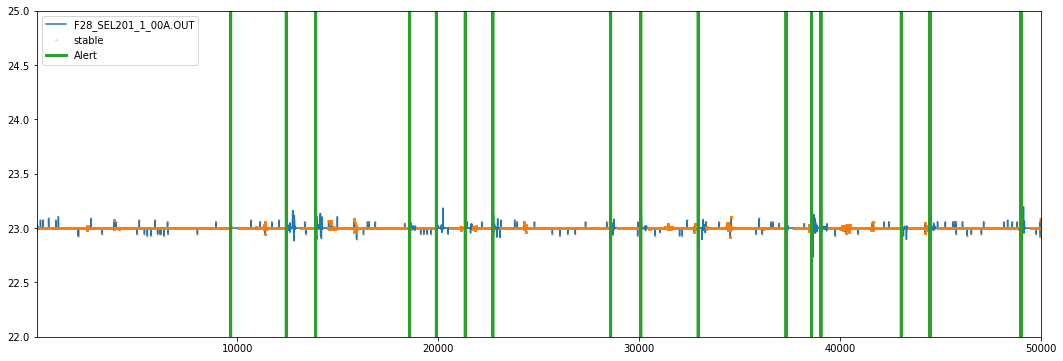

In [71]:
df_train['F28_SEL201_1_00A.OUT'].plot(figsize = (18,6))
(df_train['F28_SEL201_1_00A.OUT']*df_train['legit']).plot(linestyle='None', marker='o',markersize=2, alpha=0.2, ylim=(22,25) )
(df_train['alert']*25).plot(figsize = (18,6), alpha=1, lw=3)

#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert'])

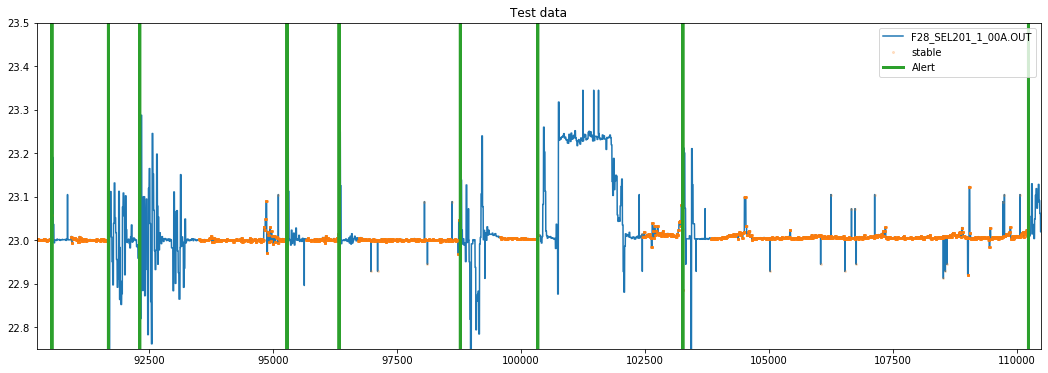

In [76]:
df_test['F28_SEL201_1_00A.OUT'].plot(figsize = (16,4), title='Test data')
(df_test['F28_SEL201_1_00A.OUT']*df_test['legit']).plot(linestyle='None', marker='o'
,markersize=2, alpha=0.2, ylim=(22.75,23.5) )
(df_test['alert']*25).plot(figsize = (18,6), alpha=1, lw=3)

#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert'])

((400, 56), 6.666666666666667)

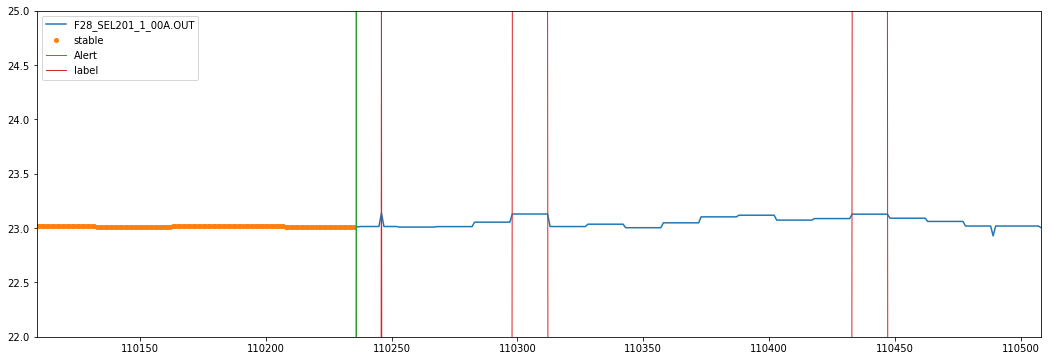

In [77]:
tmp=df.iloc[110100:110500]
tmp['F28_SEL201_1_00A.OUT'].plot(figsize = (18,6))
(tmp['F28_SEL201_1_00A.OUT']*tmp['legit']).plot(linestyle='None', marker='o',markersize=4, alpha=1, ylim=(22,25) )
(tmp['alert']*25).plot(figsize = (18,6), alpha=1, lw=1)
(tmp['label']*25).plot(figsize = (18,6), alpha=1, lw=1)

#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert', 'label'])
tmp.shape, tmp.shape[0]/60

In [207]:
alert_df = df[df.start_label>0]
indx=alert_df.index.values
indx[0:4]

array([ 9678, 12453, 13908, 18588])

In [0]:
for i in indx:
  tmp=df[i:]
  ni=tmp[tmp['legit']==1].index[0]
  #print(i, ni, ni-i)
  

In [0]:
remove=['LCC2_QY112_0_00A.DMD',
'LCC2_TIC111_0_11A.CO',
'F28_TCV201_1_30B',
       'F28_TCV201_1_30A']
for c in remove: 
  #df_train1[c]=0
  df_test1[c]=0

In [0]:
def plot_var_hist(col, df, title=''):

    l1 = df[df['legit'] == 1][col]
    l0 = df[df['legit'] == 0][col]
    f, axs = plt.subplots(2,2,figsize=(18,3))
    plt.subplot(1, 2, 1)
    plt.hist((l0,l1), 
             bins=100, alpha=0.5, 
             color=['r', 'b'])# ,density=True,)
    plt.legend(['legit','unstable'])#loc='upper right')
    plt.title(title+' ' +col)
    plt.subplot(1, 2, 2)
    
    df[col].plot()
    
    plt.show()

In [52]:
df.columns

Index(['Timestamp', 'F28_PIC201_1_00A_STD1D', 'F28_PIC201_2_00A_STD1D',
       'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV', 'F28_TIC201_1_30A.CO',
       'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A', 'F28_PIT201_2_20A',
       'F28_SEL201_1_00A.OUT', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B', 'LCC2_FIC111_0_03A.PV',
       'LCC2_PMP111_13_00.IO.SI', 'LCC2_QY111_1_10A.DMD',
       'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A', 'LCC2_PDIT112_0_00B',
       'LCC2_TIC111_0_11A.PV', 'LC12_TI650_0_03A', 'LC12_PI650_0_04A',
       'LC12_NY650_0_03A', 'LC12_NY650_0_03B', 'LC12_NY650_0_03B_A',
       'LCC2_TET112_0_06

In [0]:
cols=['F28_PIC201_1_00A_STD1D', 'F28_PIC201_2_00A_STD1D',
       'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV', 'F28_TIC201_1_30A.CO',
       'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A', 'F28_PIT201_2_20A',
       'F28_SEL201_1_00A.OUT', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B', 'LCC2_FIC111_0_03A.PV',
       'LCC2_PMP111_13_00.IO.SI', 'LCC2_QY111_1_10A.DMD',
       'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A', 'LCC2_PDIT112_0_00B',
       'LCC2_TIC111_0_11A.PV', 'LC12_TI650_0_03A', 'LC12_PI650_0_04A',
       'LC12_NY650_0_03A', 'LC12_NY650_0_03B', 'LC12_NY650_0_03B_A',
       'LCC2_TET112_0_06A_B', 'F28_PIC201_2_1_00A_STD1D',
       'F28_TIC201_2_30A_CO_PV', 'F28_SEL201_1_2_00A_OUT',
       'F28_PCV201_1_00A_B', 'F28_PCV201_2_1_01C', 'F28_TCV201_1_30B_A',
       'F28_PDIT112_0_09A_B', 'F28_PDIT112_0_09BdivB']

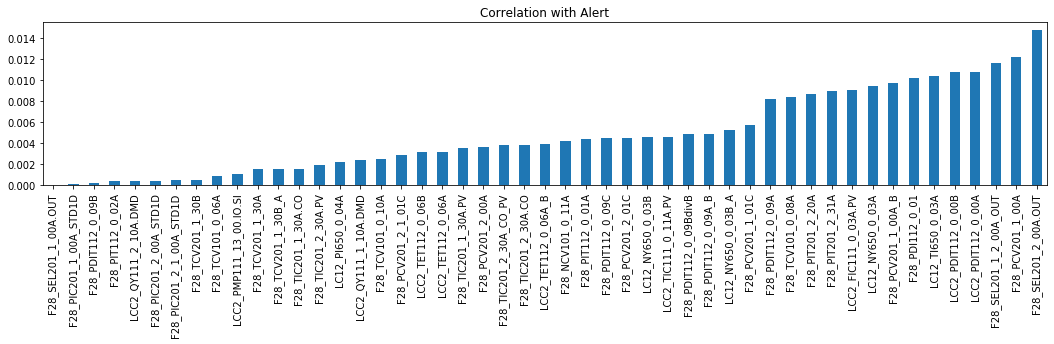

In [78]:
df[cols].corrwith(df['alert']).abs().sort_values().plot(kind='bar', figsize=(18,3), title='Correlation with Alert')

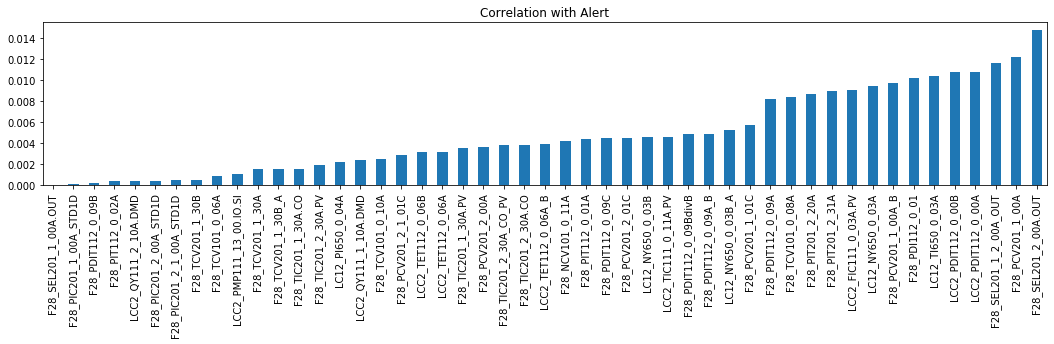

In [42]:
df[cols].corrwith(df['alert']).abs().sort_values().plot(kind='bar', figsize=(18,3), title='Correlation with Alert')

In [0]:
from sklearn import preprocessing
X_train = df_train[cols].values

sc = preprocessing.MinMaxScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
y_train=df_train['target'].values

In [0]:
from sklearn import preprocessing

X_test = df_test[cols].values


X_test = sc.transform(X_test)
y_test=df_test.target

In [0]:
X_val = df_val[cols].values

X_val = sc.transform(X_val)
y_val=df_val.target

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=90
train_generator = TimeseriesGenerator(data=X_train, targets=y_train, 
                                length=length, batch_size=32)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator

test_generator = TimeseriesGenerator(data=X_test, targets=y_test, 
                                length=length, batch_size=100)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator

val_generator = TimeseriesGenerator(data=X_val, targets=y_val, 
                                length=length, batch_size=32)

In [85]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
nb_features=X_train.shape[1]
model.add(LSTM(
         input_shape=(length, nb_features),
         units=512,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=256,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='linear'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 90, 512)           1150976   
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 512)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 1,938,689
Trainable params: 1,938,689
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
         
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator),
                       validation_data=val_generator,validation_steps=len(val_generator),       
                    epochs=50, verbose=1, 
                              callbacks=[early_stopping, checkpointer,checkpointer2])     

Epoch 1/50
3122/3123 [============================>.] - ETA: 0s - loss: 4.1520 - acc: 0.0000e+00

KeyError: ignored

In [86]:
import keras
#model.load_weights('/content/gdrive/My Drive/Intel/colab_model_new.hdf5')

from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath = PATH+'model_lstm_deep.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
checkpointer2 = ModelCheckpoint(filepath = PATH+'model_lstm_deep_classacc1.hdf5',verbose=1,
                               monitor='accuracy',
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)


          
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator),
                       validation_data=val_generator,validation_steps=len(val_generator),       
                    epochs=50, verbose=1, 
                              callbacks=[early_stopping, checkpointer,checkpointer2])         

Epoch 1/50
1559/1560 [============================>.] - ETA: 0s - loss: 2.3055 - acc: 1.0022e-04

KeyError: ignored

In [249]:
import keras
#model.load_weights('/content/gdrive/My Drive/Intel/colab_model_new.hdf5')

from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath = PATH+'model_lstm_class1.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
checkpointer2 = ModelCheckpoint(filepath = PATH+'model_lstm_classacc1.hdf5',verbose=1,
                               monitor='accuracy',
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)


          
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator),
                       validation_data=val_generator,validation_steps=len(val_generator),       
                    epochs=50, verbose=1, 
                              callbacks=[early_stopping, checkpointer,checkpointer2])         

Epoch 1/50
5005/5005 [==============================] - 2441s 488ms/step - loss: 11.3153 - acc: 1.9980e-04 - val_loss: 14.3213 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 14.32134, saving model to /content/gdrive/My Drive/Intel/model_lstm_class1.hdf5
Epoch 2/50
5005/5005 [==============================] - 2415s 483ms/step - loss: 11.3153 - acc: 0.0000e+00 - val_loss: 14.3213 - val_acc: 0.0000e+00

Epoch 00002: val_loss did not improve from 14.32134
Epoch 3/50
5005/5005 [==============================] - 2401s 480ms/step - loss: 11.3153 - acc: 0.0000e+00 - val_loss: 14.3213 - val_acc: 0.0000e+00

Epoch 00003: val_loss did not improve from 14.32134
Epoch 4/50
5005/5005 [==============================] - 2390s 478ms/step - loss: 11.3153 - acc: 0.0000e+00 - val_loss: 14.3213 - val_acc: 0.0000e+00

Epoch 00004: val_loss did not improve from 14.32134
Epoch 5/50
5005/5005 [==============================] - 2412s 482ms/step - loss: 11.3153 - acc: 0.0000e+00 - val_loss: 14

## Normalize


In [0]:
df_train.columns[1:-5]

Index(['F28_SEL201_1_00A.OUT_c', 'F28_PIC201_1_00A_STD1D',
       'F28_PIC201_2_00A_STD1D', 'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV',
       'F28_TIC201_1_30A.CO', 'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A',
       'F28_PIT201_2_20A', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_QY112_0_00A.DMD', 'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B',
       'LCC2_FIC111_0_03A.PV', 'LCC2_PMP111_13_00.IO.SI',
       'LCC2_QY111_1_10A.DMD', 'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A',
       'LCC2_PDIT112_0_00B', 'LCC2_TIC111_0_11A.CO', 'LCC2_TIC111_0_11A.PV',
       'LC12_TI650_0_03A', 'LC12_PI650_0_04A', 'LC12_NY650_0_03A',
       'LC12_NY650_0_03B', 'l

# test

In [0]:
from sklearn import preprocessing

x = df_train[df_train.columns[1:-4]].values 
sc = preprocessing.MinMaxScaler()
X = sc.fit_transform(x)
y=df_train['legit'].values


In [0]:
X_test=df_test[df_test.columns[1:-4]].values 
X_test = sc.transform(X_test)
y_test=df_test['legit'].values


In [0]:
X_test1=df_test1[df_test1.columns[1:-6]].values 
y_test1=df_test1['legit']
X_test1 = sc.transform(X_test1)

In [0]:
alert_df = df_test1[df_test1.start_label>0]
indx=alert_df.index.values
indx[0:4]
for i in indx:
    df_test1.loc[(i-10):i, ('legit')]=0
    df_test1.loc[i:(i+10), ('legit')]=0

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=120
train_generator = TimeseriesGenerator(data=X, targets=y, 
                                length=length, batch_size=100)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=120
test_generator = TimeseriesGenerator(data=X_test, targets=y_test, 
                                length=length, batch_size=100)

In [0]:
length=60
test_generator1 = TimeseriesGenerator(data=X_test1, targets=y_test1, 
                                length=length, batch_size=len(X_test1))

In [0]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM

In [51]:
model = Sequential()
nb_features=X.shape[1]
model.add(LSTM(
         input_shape=(length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 120, 100)          55200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 85,451
Trainable params: 85,451
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
import keras
model.load_weights('/content/gdrive/My Drive/Intel/colab_model_new.hdf5')
history = model.fit(train_generator, epochs=100,  steps_per_epoch=len(train_generator), verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='min'),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_model_new.hdf5',monitor='loss', save_best_only=True, mode='min', verbose=1)]
          )

Epoch 1/100
201/201 [==============================] - 89s 445ms/step - loss: 0.6173 - acc: 0.7260

Epoch 00001: loss improved from inf to 0.61393, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5
Epoch 2/100
201/201 [==============================] - 89s 444ms/step - loss: 0.5967 - acc: 0.7302

Epoch 00002: loss improved from 0.61393 to 0.59401, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5
Epoch 3/100
201/201 [==============================] - 90s 447ms/step - loss: 0.5739 - acc: 0.7445

Epoch 00003: loss improved from 0.59401 to 0.57066, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5
Epoch 4/100
201/201 [==============================] - 90s 449ms/step - loss: 0.5912 - acc: 0.7302

Epoch 00004: loss did not improve from 0.57066
Epoch 5/100
201/201 [==============================] - 89s 444ms/step - loss: 0.5859 - acc: 0.7302

Epoch 00005: loss did not improve from 0.57066
Epoch 6/100
201/201 [=============================

In [0]:
from keras.optimizers import Adam
model.load_weights('/content/gdrive/My Drive/Intel/colab_model_new.hdf5')
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01*0.5), metrics=['accuracy'])
history = model.fit(train_generator, epochs=100,  steps_per_epoch=len(train_generator), verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='min'),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_model_new.hdf5',monitor='loss', save_best_only=True, mode='min', verbose=1),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_model_newacc.hdf5',monitor='acc', save_best_only=True, mode='max', verbose=1),]
          )

Epoch 1/100
201/201 [==============================] - 90s 446ms/step - loss: 0.6177 - acc: 0.7150

Epoch 00001: loss improved from inf to 0.61886, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5

Epoch 00001: acc improved from inf to 0.71417, saving model to /content/gdrive/My Drive/Intel/colab_model_newacc.hdf5
Epoch 2/100
201/201 [==============================] - 89s 441ms/step - loss: 0.5926 - acc: 0.7302

Epoch 00002: loss improved from 0.61886 to 0.59121, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5

Epoch 00002: acc did not improve from 0.71417
Epoch 3/100
201/201 [==============================] - 89s 442ms/step - loss: 0.5679 - acc: 0.7215

Epoch 00003: loss improved from 0.59121 to 0.56739, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5

Epoch 00003: acc did not improve from 0.71417
Epoch 4/100
201/201 [==============================] - 88s 439ms/step - loss: 0.5683 - acc: 0.7121

Epoch 00004: loss improved from

In [0]:
model.save_weights(PATH+'last.hdf5')

In [31]:
from keras.optimizers import Adam
model.load_weights('/content/gdrive/My Drive/Intel/colab_model_new.hdf5')
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01*0.5*0.5), metrics=['accuracy'])
history = model.fit(train_generator, epochs=100,  steps_per_epoch=len(train_generator), verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='min'),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_model_new.hdf5',monitor='loss', save_best_only=True, mode='min', verbose=1),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_model_newacc.hdf5',monitor='acc', save_best_only=True, mode='max', verbose=1),]
          )

Epoch 1/100
201/201 [==============================] - 91s 452ms/step - loss: 0.1556 - acc: 0.9487

Epoch 00001: loss improved from inf to 0.15601, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5

Epoch 00001: acc improved from -inf to 0.94850, saving model to /content/gdrive/My Drive/Intel/colab_model_newacc.hdf5
Epoch 2/100
201/201 [==============================] - 88s 439ms/step - loss: 0.1432 - acc: 0.9397

Epoch 00002: loss improved from 0.15601 to 0.14359, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5

Epoch 00002: acc did not improve from 0.94850
Epoch 3/100
201/201 [==============================] - 89s 441ms/step - loss: 0.1305 - acc: 0.9470

Epoch 00003: loss improved from 0.14359 to 0.13092, saving model to /content/gdrive/My Drive/Intel/colab_model_new.hdf5

Epoch 00003: acc did not improve from 0.94850
Epoch 4/100
201/201 [==============================] - 89s 443ms/step - loss: 0.1147 - acc: 0.9435

Epoch 00004: loss improved fro

In [0]:
model.load_weights('/content/gdrive/My Drive/Intel/colab_model_newacc.hdf5')

In [0]:
import keras
history = model.fit(train_generator, epochs=100,  steps_per_epoch=len(train_generator), verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='min'),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_modek.hdf5',monitor='loss', save_best_only=True, mode='min', verbose=1)]
          )




Epoch 1/100





800/800 [==============================] - 202s 253ms/step - loss: 0.4186 - acc: 0.8540

Epoch 00001: loss improved from inf to 0.41878, saving model to /content/gdrive/My Drive/Intel/colab_modek.hdf5
Epoch 2/100
800/800 [==============================] - 195s 244ms/step - loss: 0.3968 - acc: 0.8543

Epoch 00002: loss improved from 0.41878 to 0.39698, saving model to /content/gdrive/My Drive/Intel/colab_modek.hdf5
Epoch 3/100
800/800 [==============================] - 194s 243ms/step - loss: 0.3921 - acc: 0.8543

Epoch 00003: loss improved from 0.39698 to 0.39231, saving model to /content/gdrive/My Drive/Intel/colab_modek.hdf5
Epoch 4/100
800/800 [==============================] - 193s 241ms/step - loss: 0.3835 - acc: 0.8544

Epoch 00004: loss improved from 0.39231 to 0.38369, saving model to /content/gdrive/My Drive/Intel/colab_modek.hdf5
Epoch 5/100
800/800 [==============================] - 193s 241ms/step - loss: 0.3761 - acc: 0.8547

Epoch 00005: loss improved 

In [0]:
model.load_weights('/content/gdrive/My Drive/Intel/colab_modek.hdf5')

In [0]:
import keras
history = model.fit(train_generator, epochs=100,  steps_per_epoch=len(train_generator), verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='min'),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_modek.hdf5',monitor='loss', save_best_only=True, mode='min', verbose=1)]
          )



Epoch 1/100
4950/4950 [==============================] - 1181s 239ms/step - loss: 0.5555 - acc: 0.7770

Epoch 00001: loss improved from inf to 0.55559, saving model to /content/gdrive/My Drive/Intel/colab_modek.hdf5
Epoch 2/100
4950/4950 [==============================] - 1181s 239ms/step - loss: 0.4298 - acc: 0.8245

Epoch 00002: loss improved from 0.55559 to 0.42980, saving model to /content/gdrive/My Drive/Intel/colab_modek.hdf5
Epoch 3/100
4950/4950 [==============================] - 1177s 238ms/step - loss: 0.4204 - acc: 0.8337

Epoch 00003: loss improved from 0.42980 to 0.42040, saving model to /content/gdrive/My Drive/Intel/colab_modek.hdf5
Epoch 4/100
4950/4950 [==============================] - 1172s 237ms/step - loss: 0.4210 - acc: 0.8356

Epoch 00004: loss did not improve from 0.42040
Epoch 5/100
4950/4950 [==============================] - 1149s 232ms/step - loss: 0.4027 - acc: 0.8428

Epoch 00005: loss improved from 0.42040 to 0.40276, saving model to /content/gdrive/My 

In [0]:
pred=model.predict(test_generator)

In [54]:
pred.shape,df_test.shape

((79840, 1), (79960, 42))

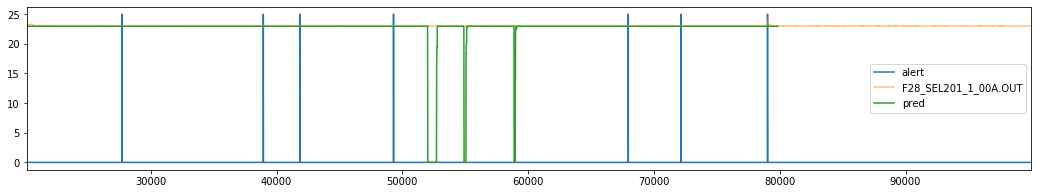

In [57]:
plt.figure(figsize=(18,3))
#df_test['reg'].plot()
(df_test.iloc[120:]['alert']*25).plot()#(ylim=(22.5,23.5), lw=2)
df_test.iloc[120:]['F28_SEL201_1_00A.OUT'].plot(alpha=0.5)
plt.plot(pred[:,0]*23, label='pred')
plt.legend()

In [0]:
pred.shape

(24940, 1)

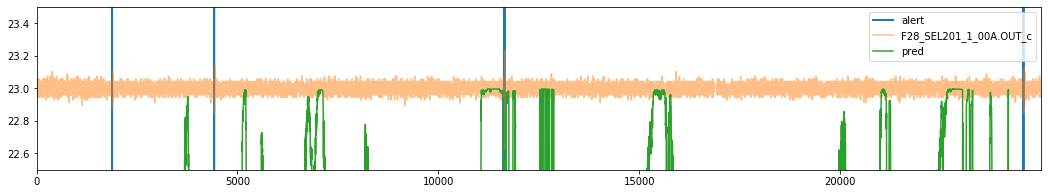

In [0]:
plt.figure(figsize=(18,3))
#df_test['reg'].plot()
(df_test['alert']*25).plot(ylim=(22.5,23.5), lw=2)
df_test['F28_SEL201_1_00A.OUT_c'].plot(alpha=0.5)
plt.plot(pred*23, label='pred')
plt.legend()

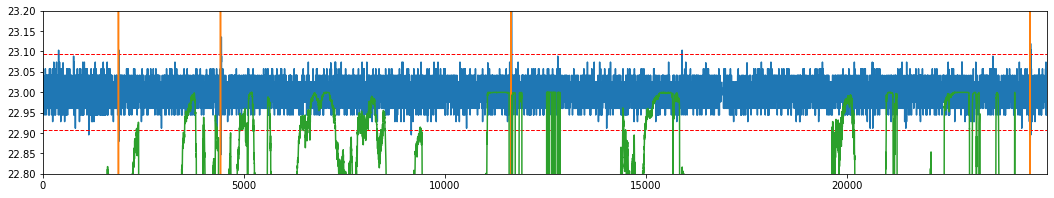

In [0]:
ax=df_test['F28_SEL201_1_00A.OUT_c'].plot(alpha=1, figsize=(18,3))
c='F28_SEL201_1_00A.OUT_c'
ax.axhline(y=df_train[c].mean() - 3*df_train[c].std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=1)
ax.axhline(y=df_train[c].mean() + 3*df_train[c].std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=1)
(df_test['alert']*24).plot(ylim=(22.8,23.2))
plt.plot(pred+22, label='pred')

In [0]:
pred1=model.predict(test_generator1)

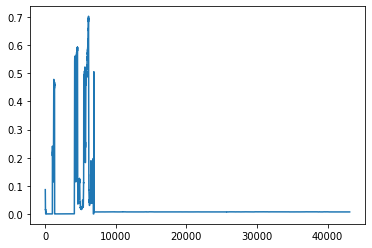

In [0]:
plt.plot(pred1)

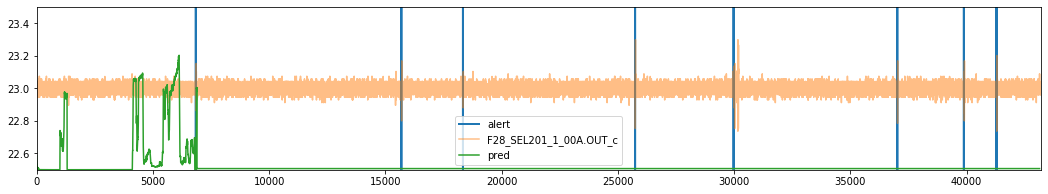

In [0]:
plt.figure(figsize=(18,3))
#df_test['reg'].plot()
(df_test1['alert']*25).plot(ylim=(22.5,23.5), lw=2)
df_test1['F28_SEL201_1_00A.OUT_c'].plot(alpha=0.5)
plt.plot(pred1+22.5, label='pred')
plt.legend()

In [0]:
model.load_weights('/content/gdrive/My Drive/Intel/colab_modek.hdf5')

In [0]:
pred_test=model.predict(test_generator)

In [0]:
pred_test

array([[0.567267  ],
       [0.5641475 ],
       [0.56638396],
       ...,
       [0.98964775],
       [0.98855776],
       [0.9908953 ]], dtype=float32)

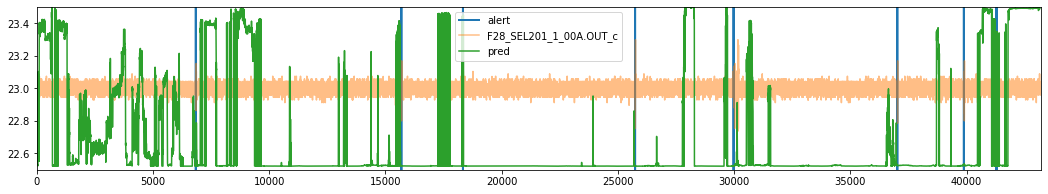

In [0]:
plt.figure(figsize=(18,3))
#df_test['reg'].plot()
(df_test1['alert']*25).plot(ylim=(22.5,23.5), lw=2)
df_test1['F28_SEL201_1_00A.OUT_c'].plot(alpha=0.5)
plt.plot(pred_test+22.5, label='pred')
plt.legend()

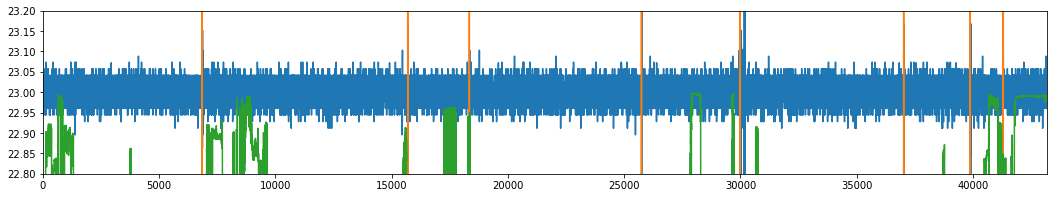

In [0]:
ax=df_test1['F28_SEL201_1_00A.OUT_c'].plot(alpha=1, figsize=(18,3))
c='F28_SEL201_1_00A.OUT_c'
#ax.axhline(y=df_train[c].mean() - 3*df_train[c].std(),
#           xmin=0, xmax=1, color='r', linestyle='--', lw=1)
#ax.axhline(y=df_train[c].mean() + 3*df_train[c].std(),
#           xmin=0, xmax=1, color='r', linestyle='--', lw=1)
(df_test1['alert']*24).plot(ylim=(22.8,23.2))
plt.plot(pred_test+22, label='pred')

In [0]:
pred_test.shape, df_test1.shape,pred_test[:,0].shape[0]-60,43201-43141

((43141, 1), (43201, 49), 43081, 60)

In [0]:
df_test1['pred1']=0
df_test1.loc[60:]['pred1']=pred_test[:,0]
df_test1[::70].head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_2_00A.OUT,F28_PCV201_1_00A,F28_PCV201_2_00A,F28_PCV201_1_01C,F28_PCV201_2_01C,F28_TCV201_1_30A,F28_TCV201_1_30B,F28_PIT112_0_01A,F28_PIT112_0_02A,F28_PDI112_0_01,F28_PDIT112_0_09A,F28_PDIT112_0_09B,F28_PDIT112_0_09C,F28_TCV101_0_06A,F28_TCV101_0_08A,F28_TCV101_0_10A,F28_NCV101_0_11A,LCC2_QY112_0_00A.DMD,LCC2_TET112_0_06A,LCC2_TET112_0_06B,LCC2_FIC111_0_03A.PV,LCC2_PMP111_13_00.IO.SI,LCC2_QY111_1_10A.DMD,LCC2_QY111_2_10A.DMD,LCC2_PDIT112_0_00A,LCC2_PDIT112_0_00B,LCC2_TIC111_0_11A.CO,LCC2_TIC111_0_11A.PV,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,label,start_label,legit,start_lable,alert,legit_lag,pred1
0,2019-04-03 17:27:00,23.041504,1.274502,1.297818,47.415504,55.000000,46.055401,55.010899,74.499023,79.499031,23.009079,0.519772,0.964972,0.0,0.0,0,0,69.212059,51.191635,18.020424,19.962711,19.873055,20.971626,17.0,256.176147,112.286049,48.099998,0,40.087547,39.477951,2116.569336,0.0,6.0,2.0,21.854734,21.952011,0,1.301364,67.146568,988.246460,22.572109,43.280006,0,0,1,0,0.0,0,0
70,2019-04-03 18:37:00,23.009079,1.265542,1.310881,47.259907,54.983788,47.427734,55.008965,74.693581,79.499031,22.992867,0.840698,2.000252,0.0,16.0,0,0,69.022377,50.899807,18.122570,19.985409,19.940014,20.971626,17.0,240.946396,123.071640,84.177307,0,40.055122,39.413101,2034.857300,0.0,6.0,2.0,21.822308,21.854734,0,4.982722,65.667969,988.597778,22.316837,43.692616,0,0,1,0,0.0,0,0
140,2019-04-03 19:47:00,23.009079,1.286302,1.324598,46.631435,55.016212,47.625904,54.978874,74.644943,79.450394,23.009079,1.322046,1.389228,0.0,16.0,0,0,69.163422,50.899807,18.263615,19.917316,19.816311,21.118027,17.0,249.088501,136.688110,159.434326,0,40.087547,39.510376,1222.600586,0.0,6.0,2.0,22.334631,22.431908,0,11.248635,62.788593,988.931580,22.472000,46.891693,0,0,1,0,0.0,0,0
210,2019-04-03 20:57:00,22.960442,1.293123,1.325210,46.604885,55.032425,45.250362,54.988640,74.644943,79.401756,23.025291,1.298376,1.255475,0.0,16.0,0,0,68.973732,50.515564,18.506805,19.917316,19.861706,21.049934,17.0,215.261169,164.628265,246.812134,0,39.990273,39.413101,988.651123,0.0,6.0,2.0,22.334631,22.464333,0,14.811481,59.455261,989.107239,22.234957,48.805790,0,0,1,0,0.0,0,0
280,2019-04-03 22:07:00,22.976654,1.299752,1.370386,46.740475,55.000000,43.020039,55.052330,74.737350,79.591438,23.057716,1.147924,13.112831,0.0,22.0,0,0,68.681908,50.228596,18.501949,19.951363,19.839008,21.196337,17.0,182.356842,166.688019,236.161270,0,39.925419,39.348248,1624.675781,0.0,6.0,2.0,22.269779,22.269779,0,14.205769,58.171204,989.282898,21.694654,48.127541,0,0,1,0,0.0,0,0


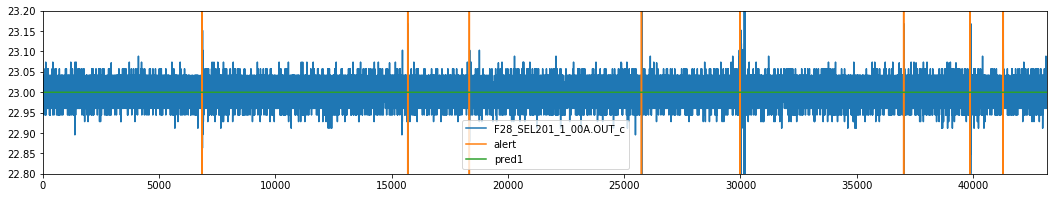

In [0]:
ax=df_test1['F28_SEL201_1_00A.OUT_c'].plot(alpha=1, figsize=(18,3))
c='F28_SEL201_1_00A.OUT_c'
#ax.axhline(y=df_train[c].mean() - 3*df_train[c].std(),
#           xmin=0, xmax=1, color='r', linestyle='--', lw=1)
#ax.axhline(y=df_train[c].mean() + 3*df_train[c].std(),
#           xmin=0, xmax=1, color='r', linestyle='--', lw=1)
(df_test1['alert']*24).plot(ylim=(22.8,23.2))
(df_test1['pred1']+23).plot(ylim=(22.8,23.2))
plt.legend()

In [0]:
## Test 2

In [0]:
from sklearn import preprocessing

x = df_train1[df_train.columns[1:-6]].values 
sc = preprocessing.MinMaxScaler()
X = sc.fit_transform(x)
y=df_train1['legit'].values
X_test=df_test1[df_test.columns[1:-6]]
X_test = sc.fit_transform(X_test)
y_test=df_test1['legit']

In [0]:
length=60
train_gen1 = TimeseriesGenerator(data=X, targets=y, start_index=50000,
                                length=length, batch_size=60)
length=60
val_gen1 = TimeseriesGenerator(data=X, targets=y, end_index=50000,
                                length=length, batch_size=50000)

In [0]:
model1 = Sequential()
nb_features=X.shape[1]
model1.add(LSTM(
         input_shape=(length, nb_features),
         units=100,
         return_sequences=True))
model1.add(Dropout(0.2))

model1.add(LSTM(
          units=50,
          return_sequences=False))
model1.add(Dropout(0.2))

model1.add(Dense(units=1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 100)           56800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 87,051
Trainable params: 87,051
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1.load_weights('/content/gdrive/My Drive/Intel/colab_modek.hdf5')

In [0]:
import keras
history1 = model1.fit(train_gen1, epochs=100,  steps_per_epoch=len(train_gen1), verbose=1,
                    validation_data=val_gen1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='min'),
                       keras.callbacks.ModelCheckpoint(PATH+'colab_model1.hdf5',monitor='loss', save_best_only=True, mode='min', verbose=1)]
          )

Epoch 1/100
7416/7416 [==============================] - 1799s 243ms/step - loss: 0.5308 - acc: 0.7867 - val_loss: 0.3589 - val_acc: 0.8852

Epoch 00001: loss improved from inf to 0.53080, saving model to /content/gdrive/My Drive/Intel/colab_model1.hdf5
Epoch 2/100
7416/7416 [==============================] - 1794s 242ms/step - loss: 0.4366 - acc: 0.8238 - val_loss: 0.4226 - val_acc: 0.8768

Epoch 00002: loss improved from 0.53080 to 0.43659, saving model to /content/gdrive/My Drive/Intel/colab_model1.hdf5
Epoch 3/100
7416/7416 [==============================] - 1810s 244ms/step - loss: 0.4142 - acc: 0.8341 - val_loss: 0.5427 - val_acc: 0.6527

Epoch 00003: loss improved from 0.43659 to 0.41425, saving model to /content/gdrive/My Drive/Intel/colab_model1.hdf5
Epoch 4/100
7416/7416 [==============================] - 1811s 244ms/step - loss: 0.4216 - acc: 0.8352 - val_loss: 0.3756 - val_acc: 0.8653

Epoch 00004: loss did not improve from 0.41425
Epoch 5/100
7416/7416 [===================

In [0]:
X_test.shape,X.shape

((43201, 41), (495000, 41))

In [0]:
model.save_weights(PATH+'colab_lasy.hd5')

NameError: ignored

In [0]:
from sklearn import preprocessing

x = df_all[df_all.columns[1:-5]].values
sc = preprocessing.MinMaxScaler()
X = sc.fit_transform(x)
y=df_all['alert'].values
ylabel=df_all['label'].values

## Simple autoencoder

### define train-test

In [0]:
t=df_all.iloc[805000]['Timestamp']
endt=df_all.iloc[1300000]['Timestamp']
t,endt

('2018-04-24 23:27:00', '2019-04-03 17:27:00')

In [0]:
df_train=df_all.iloc[805000:1300000]
t,endt,980000-780000

('2018-04-24 23:27:00', '2019-04-03 17:27:00', 200000)

In [0]:

df_test=df_all.loc[1300000:1300000+60*24*30]
t,endt

('2018-04-24 23:27:00', '2019-04-03 17:27:00')

In [0]:
df_train_legit = df_train[df_train['legit']>0].copy()
df_train_legit.head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_2_00A.OUT,F28_PCV201_1_00A,F28_PCV201_2_00A,F28_PCV201_1_01C,F28_PCV201_2_01C,F28_TCV201_1_30A,F28_TCV201_1_30B,F28_PIT112_0_01A,F28_PIT112_0_02A,F28_PDI112_0_01,F28_PDIT112_0_09A,F28_PDIT112_0_09B,F28_PDIT112_0_09C,F28_TCV101_0_06A,F28_TCV101_0_08A,F28_TCV101_0_10A,F28_NCV101_0_11A,LCC2_QY112_0_00A.DMD,LCC2_TET112_0_06A,LCC2_TET112_0_06B,LCC2_FIC111_0_03A.PV,LCC2_PMP111_13_00.IO.SI,LCC2_QY111_1_10A.DMD,LCC2_QY111_2_10A.DMD,LCC2_PDIT112_0_00A,LCC2_PDIT112_0_00B,LCC2_TIC111_0_11A.CO,LCC2_TIC111_0_11A.PV,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,label,start_label,legit,start_lable,alert,legit_lag
133,2019-01-20 21:40:00,22.976654,1.522646,0.790397,44.571404,55.000000,44.015858,54.989685,74.401749,78.346306,22.976654,1.501680,3.229484,0.0,0.0,44.013309,22.0,69.022377,50.228596,18.793781,20.041019,19.917316,20.870623,70.917084,96.772888,119.500938,26.000000,1.5,40.055122,39.477951,1980.544678,0.0,5.0,2.0,21.245136,21.407263,38.5,1.876189,53.171219,995.712402,19.554684,44.748928,0,0,1,0,0.0,1
134,2019-01-20 21:41:00,22.976654,1.522646,0.790397,44.563004,55.000000,43.986275,54.994007,74.260696,78.151749,22.992867,1.146870,3.216887,0.0,0.0,44.015045,22.0,68.925095,50.277241,18.696491,19.951363,19.917316,20.815012,68.258026,83.300003,119.711311,24.600000,1.5,40.087547,39.542801,2169.422852,0.0,5.0,2.0,21.212711,21.374838,38.5,1.686304,53.365765,995.712402,19.611618,44.786102,0,0,1,0,0.0,0
135,2019-01-20 21:42:00,23.041504,1.522646,0.790397,44.507771,54.983788,43.925636,54.989254,74.163422,78.151749,22.992867,0.282908,3.231624,0.0,0.0,43.906109,22.0,68.925095,50.325878,18.599216,19.985409,19.839008,20.859274,60.235977,81.083725,120.128899,25.000000,1.5,40.055122,39.604412,2239.948242,0.0,5.0,2.0,21.212711,21.277561,38.5,1.649145,53.365765,995.712402,19.593550,44.716824,0,0,1,0,0.0,0
136,2019-01-20 21:43:00,22.976654,1.522646,0.790880,44.596371,55.000000,43.892811,54.989819,74.309341,78.249031,22.992867,0.851803,3.253705,0.0,0.0,43.882668,22.0,68.925095,50.374516,18.550579,19.873055,19.816311,20.769617,64.189262,92.830383,119.232277,24.299999,1.5,40.116730,39.604412,2179.150391,0.0,5.0,2.0,21.183529,21.245136,38.5,1.519500,53.560318,995.712402,19.689859,44.904587,0,0,1,0,0.0,0
137,2019-01-20 21:44:00,23.009079,1.522646,0.790880,44.449516,54.983788,43.806839,54.986107,74.401749,78.249031,22.992867,0.672007,2.901392,0.0,0.0,43.821991,22.0,68.973732,50.277241,18.647854,19.940014,19.839008,20.937580,60.116409,100.002640,119.633926,23.600000,1.5,40.116730,39.604412,2107.003906,0.0,5.0,2.0,21.374838,21.439690,38.5,1.644598,53.560318,995.712402,19.680912,44.904587,0,0,1,0,0.0,0


In [0]:
df_train_legit.columns[1:-6]

Index(['F28_SEL201_1_00A.OUT_c', 'F28_PIC201_1_00A_STD1D',
       'F28_PIC201_2_00A_STD1D', 'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV',
       'F28_TIC201_1_30A.CO', 'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A',
       'F28_PIT201_2_20A', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_QY112_0_00A.DMD', 'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B',
       'LCC2_FIC111_0_03A.PV', 'LCC2_PMP111_13_00.IO.SI',
       'LCC2_QY111_1_10A.DMD', 'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A',
       'LCC2_PDIT112_0_00B', 'LCC2_TIC111_0_11A.CO', 'LCC2_TIC111_0_11A.PV',
       'LC12_TI650_0_03A', 'LC12_PI650_0_04A', 'LC12_NY650_0_03A',
       'LC12_NY650_0_03B'],
 

### filter X_train

In [0]:
X_train.shape

(392503, 42)

In [0]:
from sklearn import preprocessing
df_train_legit = df_train[df_train['legit']>0].copy()
X_train = df_train_legit[df_train_legit.columns[1:-6]].values
X_test = df_test[df_test.columns[1:-6]].values
sc = preprocessing.MinMaxScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:


act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(64,activation=act_func,
                kernel_initializer='glorot_uniform',
                #kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(16,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(64,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [0]:
from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath =PATH+ 'model_auto_encoder_best3_5.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.001, verbose=1)

In [0]:
X_train.shape

(67359, 41)

In [0]:
history=model.fit(np.array(X_train[:-1,:]),np.array(X_train[1:,]),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1, callbacks=[early_stopping, checkpointer])#, reduce_lr ])

Train on 63990 samples, validate on 3368 samples
Epoch 1/100
63990/63990 [==============================] - 29s 460us/step - loss: 0.0015 - val_loss: 0.0015

Epoch 00001: val_loss improved from inf to 0.00148, saving model to /content/gdrive/My Drive/Intel/model_auto_encoder_best3_4.hdf5
Epoch 2/100
63990/63990 [==============================] - 29s 453us/step - loss: 0.0015 - val_loss: 0.0015

Epoch 00002: val_loss did not improve from 0.00148
Epoch 3/100
63990/63990 [==============================] - 29s 458us/step - loss: 0.0015 - val_loss: 0.0015

Epoch 00003: val_loss did not improve from 0.00148
Epoch 4/100
63990/63990 [==============================] - 29s 447us/step - loss: 0.0014 - val_loss: 0.0015

Epoch 00004: val_loss did not improve from 0.00148
Epoch 5/100
63990/63990 [==============================] - 28s 443us/step - loss: 0.0014 - val_loss: 0.0014

Epoch 00005: val_loss improved from 0.00148 to 0.00138, saving model to /content/gdrive/My Drive/Intel/model_auto_encoder_

In [0]:
model.load_weights(PATH+'model_auto_encoder_best3_4.hdf5')

In [0]:
from keras import optimizers
model.compile(loss='mse',optimizer=optimizers.Adam(lr=0.0001))
history2=model.fit(np.array(X_train[0:-1,:]),np.array(X_train[1:,:]),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                   shuffle=True,
                  verbose = 1, callbacks=[early_stopping, checkpointer])#, reduce_lr ])

Train on 63990 samples, validate on 3368 samples
Epoch 1/100
63990/63990 [==============================] - 28s 442us/step - loss: 0.0014 - val_loss: 0.0013

Epoch 00001: val_loss did not improve from 0.00077
Epoch 2/100
63990/63990 [==============================] - 28s 443us/step - loss: 0.0013 - val_loss: 0.0012

Epoch 00002: val_loss did not improve from 0.00077
Epoch 3/100
63990/63990 [==============================] - 28s 444us/step - loss: 0.0013 - val_loss: 0.0012

Epoch 00003: val_loss did not improve from 0.00077
Epoch 4/100
63990/63990 [==============================] - 28s 439us/step - loss: 0.0013 - val_loss: 0.0012

Epoch 00004: val_loss did not improve from 0.00077
Epoch 5/100
63990/63990 [==============================] - 28s 441us/step - loss: 0.0013 - val_loss: 0.0012

Epoch 00005: val_loss did not improve from 0.00077
Epoch 6/100
63990/63990 [==============================] - 28s 439us/step - loss: 0.0013 - val_loss: 0.0012

Epoch 00006: val_loss did not improve from

In [0]:
model.load_weights('model_auto_encoder_best3_1s.hdf5')

In [0]:
from keras import optimizers
model.compile(loss='mse',optimizer=optimizers.Adam(lr=0.0005))

In [0]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1, callbacks=[early_stopping, checkpointer])#, reduce_lr ])

Train on 33942 samples, validate on 1787 samples
Epoch 1/100
33942/33942 [==============================] - 16s 457us/step - loss: 2.5409e-04 - val_loss: 2.4645e-04

Epoch 00001: val_loss improved from 0.00025 to 0.00025, saving model to model_auto_encoder_best3_1s.hdf5
Epoch 2/100
33942/33942 [==============================] - 15s 444us/step - loss: 2.4784e-04 - val_loss: 2.6832e-04

Epoch 00002: val_loss did not improve from 0.00025
Epoch 3/100
33942/33942 [==============================] - 15s 444us/step - loss: 2.4249e-04 - val_loss: 1.9139e-04

Epoch 00003: val_loss improved from 0.00025 to 0.00019, saving model to model_auto_encoder_best3_1s.hdf5
Epoch 4/100
33942/33942 [==============================] - 15s 445us/step - loss: 2.3904e-04 - val_loss: 2.5056e-04

Epoch 00004: val_loss did not improve from 0.00019
Epoch 5/100
33942/33942 [==============================] - 15s 443us/step - loss: 2.3553e-04 - val_loss: 2.4953e-04

Epoch 00005: val_loss did not improve from 0.00019
Epo

In [0]:
model.load_weights('model_auto_encoder_best3_1s.hdf5')
model.compile(loss='mse',optimizer=optimizers.Adam(lr=0.0001))
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=8, 
                  shuffle=True,
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1, callbacks=[early_stopping, checkpointer])#, reduce_lr ])

Train on 33942 samples, validate on 1787 samples
Epoch 1/100
33942/33942 [==============================] - 19s 573us/step - loss: 2.2574e-04 - val_loss: 2.4270e-04

Epoch 00001: val_loss did not improve from 0.00019
Epoch 2/100
33942/33942 [==============================] - 19s 561us/step - loss: 2.2416e-04 - val_loss: 2.2104e-04

Epoch 00002: val_loss did not improve from 0.00019
Epoch 3/100
33942/33942 [==============================] - 19s 563us/step - loss: 2.2288e-04 - val_loss: 2.1238e-04

Epoch 00003: val_loss did not improve from 0.00019
Epoch 4/100
33942/33942 [==============================] - 19s 558us/step - loss: 2.2170e-04 - val_loss: 2.2265e-04

Epoch 00004: val_loss did not improve from 0.00019
Epoch 5/100
33942/33942 [==============================] - 19s 556us/step - loss: 2.2062e-04 - val_loss: 2.1551e-04

Epoch 00005: val_loss did not improve from 0.00019
Epoch 6/100
33942/33942 [==============================] - 19s 564us/step - loss: 2.1994e-04 - val_loss: 2.1810

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2688      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_4 (Dense)              (None, 41)                2665      
Total params: 7,997
Trainable params: 7,997
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.load_weights('model_auto_encoder_best3_1s.hdf5')
model.compile(loss='mse',optimizer=optimizers.Adam(lr=0.000001))
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=8, 
                  shuffle=True,
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1, callbacks=[early_stopping, checkpointer])#, r

Train on 33942 samples, validate on 1787 samples
Epoch 1/100
33942/33942 [==============================] - 19s 574us/step - loss: 1.9461e-04 - val_loss: 2.0658e-04

Epoch 00001: val_loss did not improve from 0.00019
Epoch 2/100
33942/33942 [==============================] - 19s 560us/step - loss: 1.9401e-04 - val_loss: 2.0681e-04

Epoch 00002: val_loss did not improve from 0.00019
Epoch 3/100
33942/33942 [==============================] - 19s 557us/step - loss: 1.9387e-04 - val_loss: 2.0841e-04

Epoch 00003: val_loss did not improve from 0.00019
Epoch 4/100
33942/33942 [==============================] - 19s 552us/step - loss: 1.9380e-04 - val_loss: 2.0940e-04

Epoch 00004: val_loss did not improve from 0.00019
Epoch 5/100
33942/33942 [==============================] - 19s 563us/step - loss: 1.9375e-04 - val_loss: 2.0876e-04

Epoch 00005: val_loss did not improve from 0.00019
Epoch 6/100
33942/33942 [==============================] - 19s 568us/step - loss: 1.9371e-04 - val_loss: 2.0982

In [0]:
X_train.shape,X_test.shape

((35729, 41), (10080, 41))

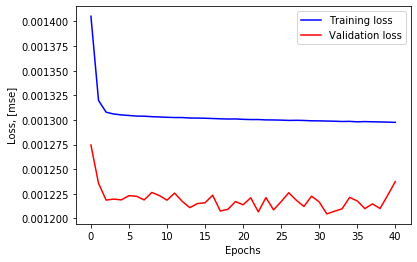

In [0]:
plt.plot(history2.history['loss'],
         'b',
         label='Training loss')
plt.plot(history2.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')

plt.show()

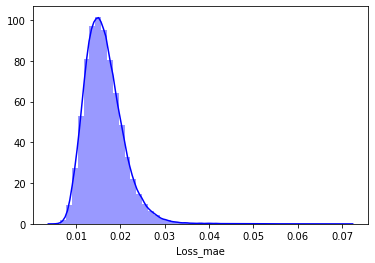

In [0]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=df_train.columns[1:-6])
X_pred.index = df_train_legit.index

scored = pd.DataFrame(index=df_train_legit.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 50, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])

In [0]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=df_train.columns[1:-6])
X_pred.index = df_test.index

scored = pd.DataFrame(index=df_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.05
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
0,0.014300,0.05,False
1,0.019141,0.05,False
2,0.017537,0.05,False
3,0.020497,0.05,False
4,0.019994,0.05,False


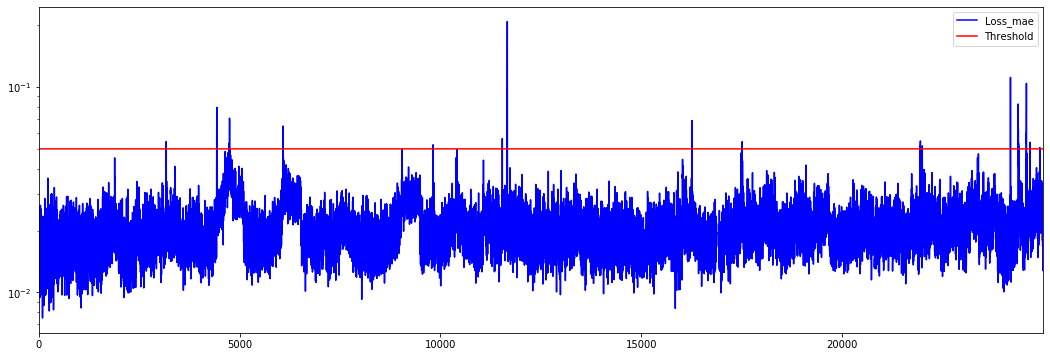

In [0]:
scored.plot(logy=True,  figsize = (18,6),  color = ['blue','red'])


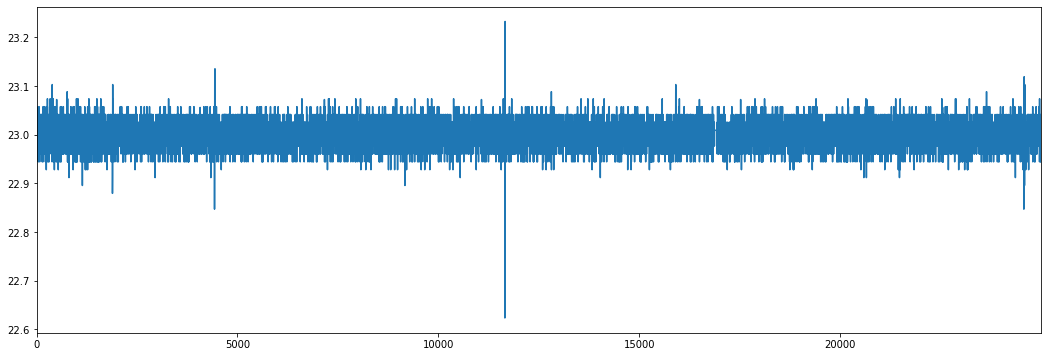

In [0]:
df_test['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))

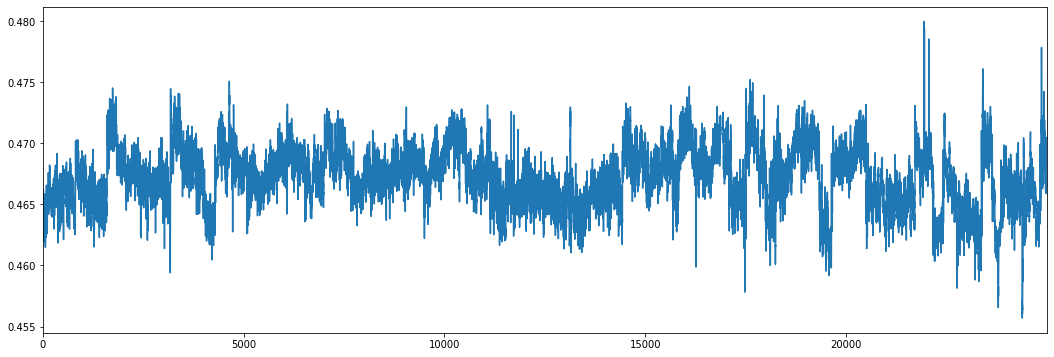

In [0]:
X_pred['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))


In [0]:
X_pred['F28_SEL201_1_00A.OUT_c_sc']=sc.inverse_transform(X_pred['F28_SEL201_1_00A.OUT_c'].values.reshape(-1, 1))

ValueError: ignored

In [0]:
c=np.array(sc.transform(df_test[df_test.columns[1:-6]]).shape)
c.shape

(2,)

In [0]:
t=sc.inverse_transform(X_pred.values)

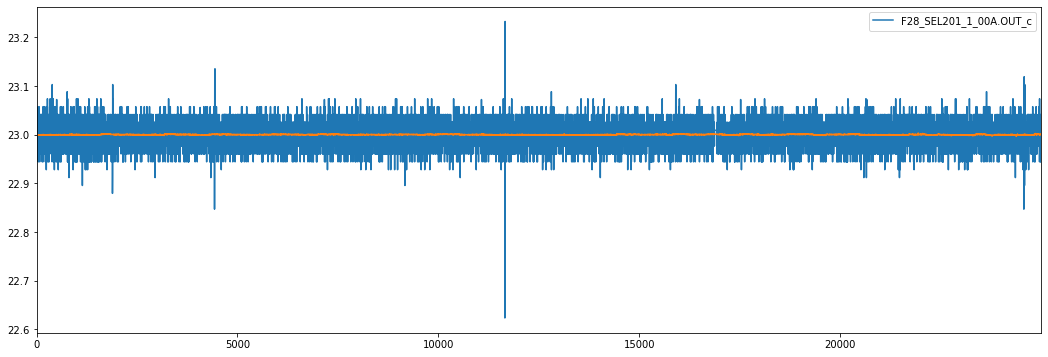

In [0]:
df_test['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
plt.plot(t[:,0])
plt.legend()

In [0]:
df_test.shape,X_pred.shape

((25000, 48), (25000, 41))

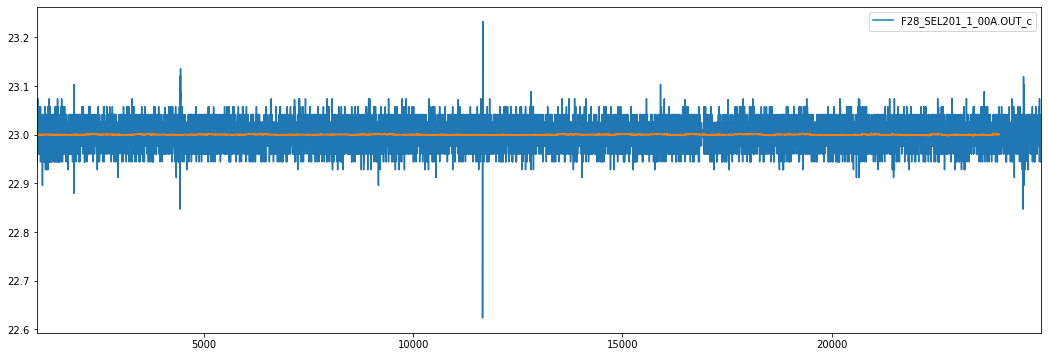

In [0]:
df_test.iloc[1000:]['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
plt.plot(t[1000:,0])
plt.legend()

In [0]:
df_new = pd.concat([df_test,scored],axis=1 )
df_new.shape, df_test.shape, scored.shape

((25000, 51), (25000, 48), (25000, 3))

In [0]:
#.set_index(['Timestamp'])

In [0]:
#df_new = df_new.reset_index()

In [0]:
df_new['Anomaly'] = df_new['Anomaly'].astype(int)

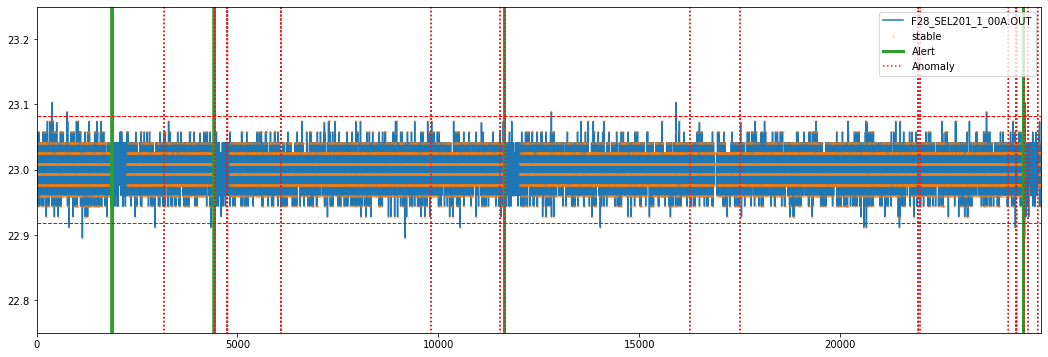

In [0]:
ax=df_new['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(df_new['F28_SEL201_1_00A.OUT_c']*df_new['legit']).plot(linestyle='None', marker='o',markersize=2, alpha=0.2 )
(df_new['alert']*25).plot(figsize = (18,6), alpha=1, lw=3)
(df_new['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=1, linestyle=':')
#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert', 'Anomaly'])
r=df_new['F28_SEL201_1_00A.OUT_c']


ax.axhline(y=r.mean() - 3.5*r.std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=1)
ax.axhline(y=r.mean() + 3.5*r.std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=1)

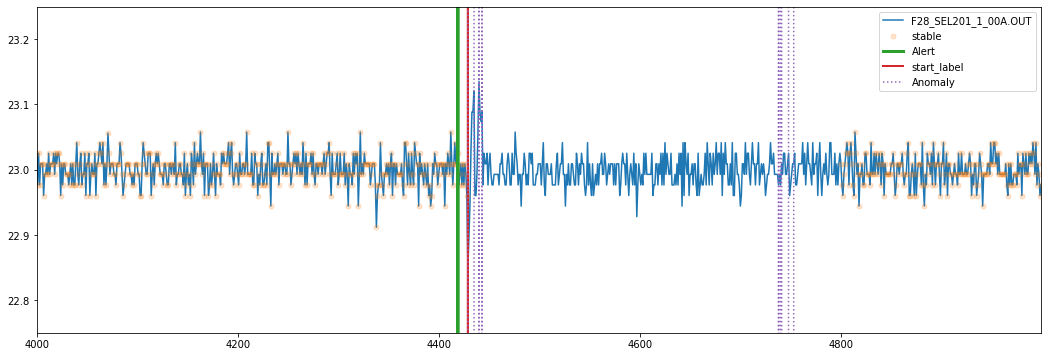

In [0]:
tmp=df_new.iloc[4000:5000].copy()
tmp['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(tmp['F28_SEL201_1_00A.OUT_c']*tmp['legit']).plot(linestyle='None', marker='o',markersize=5, alpha=0.2 )
(tmp['alert']*25).plot(figsize = (18,6), alpha=1, lw=3)
(tmp['start_label']*25).plot(figsize = (18,6), alpha=1, lw=2)

(tmp['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=1, linestyle=':')
#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert','start_label', 'Anomaly'])

In [0]:
tmp.head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_2_00A.OUT,F28_PCV201_1_00A,F28_PCV201_2_00A,F28_PCV201_1_01C,F28_PCV201_2_01C,F28_TCV201_1_30A,F28_TCV201_1_30B,F28_PIT112_0_01A,F28_PIT112_0_02A,F28_PDI112_0_01,F28_PDIT112_0_09A,F28_PDIT112_0_09B,F28_PDIT112_0_09C,F28_TCV101_0_06A,F28_TCV101_0_08A,F28_TCV101_0_10A,F28_NCV101_0_11A,LCC2_QY112_0_00A.DMD,LCC2_TET112_0_06A,LCC2_TET112_0_06B,LCC2_FIC111_0_03A.PV,LCC2_PMP111_13_00.IO.SI,LCC2_QY111_1_10A.DMD,LCC2_QY111_2_10A.DMD,LCC2_PDIT112_0_00A,LCC2_PDIT112_0_00B,LCC2_TIC111_0_11A.CO,LCC2_TIC111_0_11A.PV,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,label,start_label,legit,start_lable,alert,legit_lag,Loss_mae,Threshold,Anomaly


### Filter alert

> after each alert, turnoff to next legit, 

> continue to turn off, until window of time is in mean+-<3>*std

> filter begining 20 Minutes

In [0]:
val=(df_new[df_new['alert']>0].index - df_new.index[0]).values
val

array([ 6849, 15689, 18339, 25742, 29979, 37020, 39884, 41287])

In [0]:
val=(df_new[df_new['alert']>0].index ).values
val

array([ 6849, 15689, 18339, 25742, 29979, 37020, 39884, 41287])

In [0]:
val=(df_new[df_new['Anomaly']>0].index- df_new.index[0] ).values
val

array([   59,    60,    61, ..., 43198, 43199, 43200])

In [0]:
def get_next_legit(ind, df=df_new):
    tmp = df[ind+1:]
    #print(len(tmp[tmp['legit']>0]))
    if(len(tmp[tmp['legit']>0])==0):
        return 0
    return tmp[tmp['legit']>0].index[0]
    
    

In [0]:
window=60
df_new['tmp']=0
avals=df_new['Anomaly'].values
print(avals.sum(), df_new['Anomaly'].sum())
avals.shape
for v in val:
    next_legit = get_next_legit(v, df_new)- df_new.index[0] 
    #print(v, next_legit)
    if (next_legit>0):
        avals[v+1 : next_legit+1+window]=0
avals[0:window]=0
df_new['tmp']=avals
df_new['tmp']
avals.sum(), df_new['Anomaly'].sum()

6673 6673


(20, 20)

In [0]:
val=(df_new[df_new['tmp']>0].index- df_new.index[0] ).values
val

array([ 1370,  6861,  8248,  8319,  8477,  9952, 14382, 15699, 16945,
       18349, 21239, 25753, 29932, 30028, 33015, 33186, 37031, 38467,
       38650, 39892])

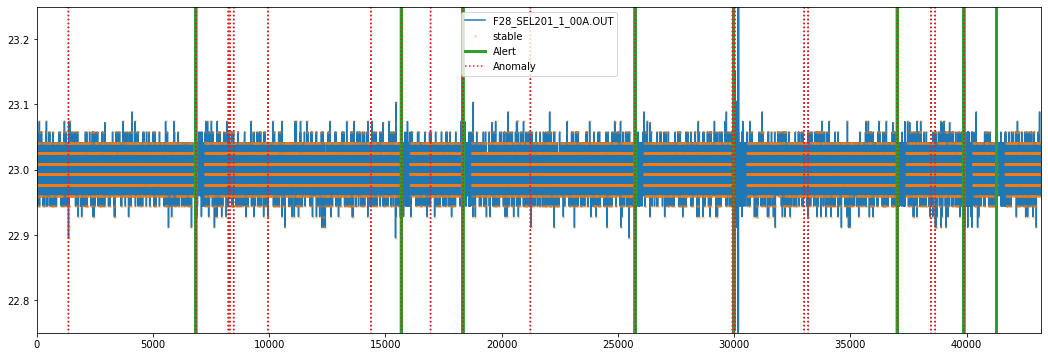

In [0]:
df_new['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(df_new['F28_SEL201_1_00A.OUT_c']*df_new['legit']).plot(linestyle='None', marker='o',markersize=2, alpha=0.2 )
(df_new['alert']*25).plot(figsize = (18,6), alpha=1, lw=3)
(df_new['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=1, linestyle=':')
#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert', 'Anomaly'])

In [0]:
val=(df_new[df_new['alert']>0].index - df_new.index[0]).values
val

array([ 7315,  8532, 11646, 13064, 14337, 15916, 22878, 28681, 34724,
       39279], dtype=int64)

In [0]:
(df_new[df_new['Anomaly']>0].index- df_new.index[0] ).values

array([  113,  3060,  4497,  5708,  5879,  7319,  8511, 11654, 12929,
       14247, 15368, 15633, 15927, 17126, 22891, 27244, 28691, 33056,
       34734, 35671, 35819, 38835, 39291], dtype=int64)

In [0]:
df_new.iloc[113:].head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,...,LC12_NY650_0_03B,label,start_label,legit,alert,legit_lag,Loss_mae,Threshold,Anomaly,tmp
980113,2018-08-24 14:00:00,23.11933,1.42447,0.89812,30.26626,55.09727,31.50080,55.06452,74.26070,77.52918,...,64.48547,0,0,1,0.00000,0,0.01717,0.01500,1,1
980114,2018-08-24 14:01:00,23.12094,1.42447,0.89812,30.47509,55.06485,31.49376,55.03407,74.16342,77.57295,...,64.45455,0,0,1,0.00000,0,0.01624,0.01500,0,0
980115,2018-08-24 14:02:00,23.05772,1.42447,0.89812,30.15882,54.95298,30.49558,54.91312,74.06615,77.48055,...,63.66491,0,0,1,0.00000,0,0.01604,0.01500,0,0
980116,2018-08-24 14:03:00,22.94423,1.42447,0.89812,29.50599,54.82490,29.12004,54.81570,74.06615,77.38327,...,63.15633,0,0,1,0.00000,0,0.01119,0.01500,0,0
980117,2018-08-24 14:04:00,22.91180,1.42447,0.92232,28.95978,54.82490,28.37585,54.83418,73.92023,77.23736,...,63.52976,0,0,1,0.00000,0,0.01207,0.01500,0,0


In [0]:
v=val[0]
next_legit = get_next_legit(v, df_new)
print(next_legit)
df_new.iloc[v+1 : next_legit]

987316


,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,...,LC12_NY650_0_03B,label,start_label,legit,alert,legit_lag,Loss_mae,Threshold,Anomaly,tmp
987316,2018-08-29 14:03:00,23.02529,1.33767,0.66575,26.44649,55.11349,25.87257,55.03685,73.96887,77.28600,...,64.07120,0,0,1,0.00000,0,0.01154,0.01500,0,0
987317,2018-08-29 14:04:00,23.04150,1.33767,0.66888,26.61451,55.08106,25.85118,55.01797,73.96887,77.28600,...,64.16039,0,0,1,0.00000,0,0.01363,0.01500,0,0
987318,2018-08-29 14:05:00,23.05772,1.33767,0.66888,26.66121,55.03242,25.71629,54.99791,73.92023,77.28600,...,64.10911,0,0,1,0.00000,0,0.01472,0.01500,0,0
987319,2018-08-29 14:06:00,22.99287,1.33767,0.66888,26.73830,55.01621,25.52826,54.98120,73.96887,77.28600,...,64.16307,0,0,1,0.00000,0,0.01519,0.01500,1,1
987320,2018-08-29 14:07:00,22.94423,1.33767,0.66888,26.64132,54.98379,25.50987,54.98536,73.92023,77.38327,...,64.44267,0,0,1,0.00000,0,0.01431,0.01500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023196,2018-09-23 12:03:00,23.02529,1.25592,0.73200,23.57868,55.00000,22.83324,55.01519,73.87646,77.67023,...,60.05409,0,0,1,0.00000,0,0.00863,0.01500,0,0
1023197,2018-09-23 12:04:00,22.97665,1.25592,0.73200,23.56433,54.98379,22.90130,55.01847,73.96887,77.67023,...,60.01696,0,0,1,0.00000,0,0.00889,0.01500,0,0
1023198,2018-09-23 12:05:00,22.99287,1.25592,0.73200,23.56741,55.01621,23.05615,55.02546,73.92023,77.62159,...,58.61407,0,0,1,0.00000,0,0.00700,0.01500,0,0
1023199,2018-09-23 12:06:00,22.96044,1.25592,0.73200,23.65348,55.01621,23.12244,55.01962,73.96887,77.67023,...,58.26685,0,0,1,0.00000,0,0.00858,0.01500,0,0


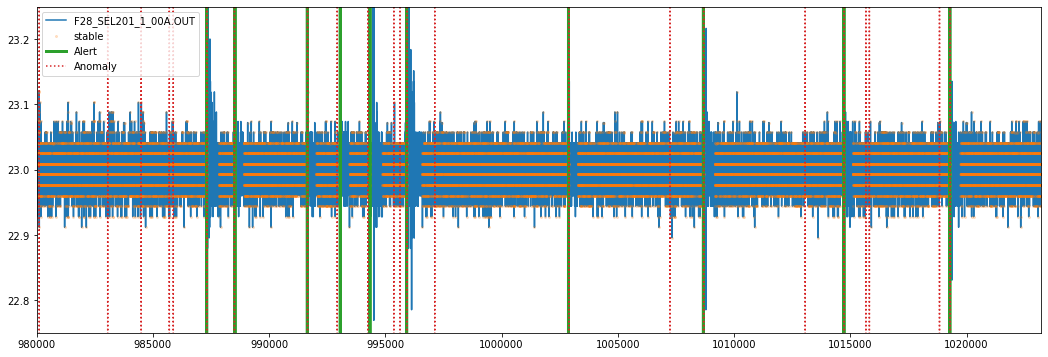

In [0]:
df_new['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(df_new['F28_SEL201_1_00A.OUT_c']*df_new['legit']).plot(linestyle='None', marker='o',markersize=2, alpha=0.2 )
(df_new['alert']*25).plot(figsize = (18,6), alpha=1, lw=3)
(df_new['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=1, linestyle=':')
#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert', 'Anomaly'])

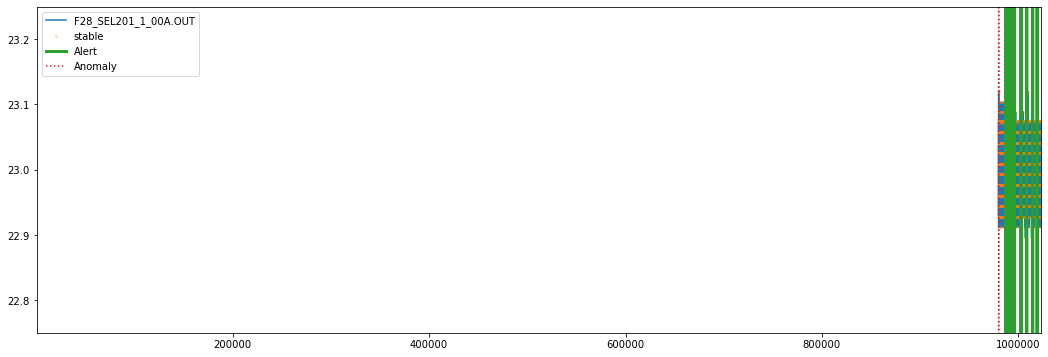

In [0]:
df_new['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(df_new['F28_SEL201_1_00A.OUT_c']*df_new['legit']).plot(linestyle='None', marker='o',markersize=2, alpha=0.2 )
(df_new['alert']*25).plot(figsize = (18,6), alpha=1, lw=3)
(df_new['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=1, linestyle=':')
#(df_new['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend(['F28_SEL201_1_00A.OUT','stable', 'Alert', 'Anomaly'])

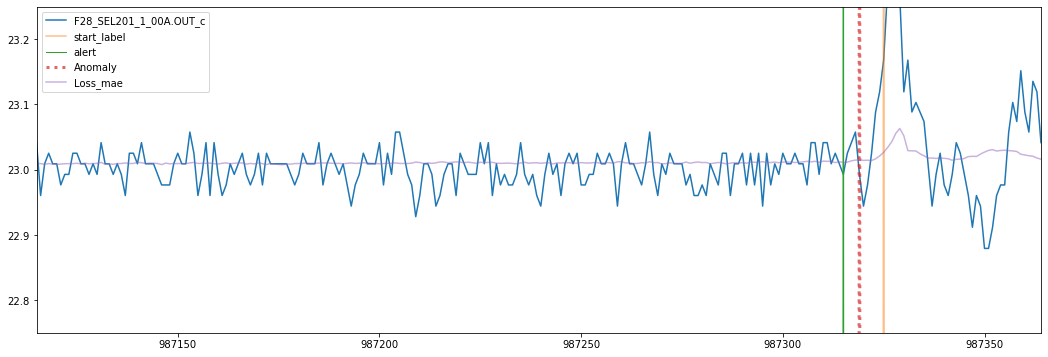

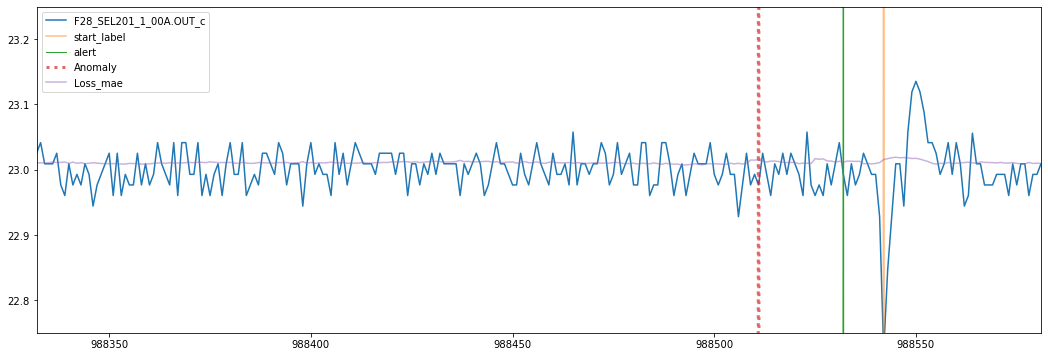

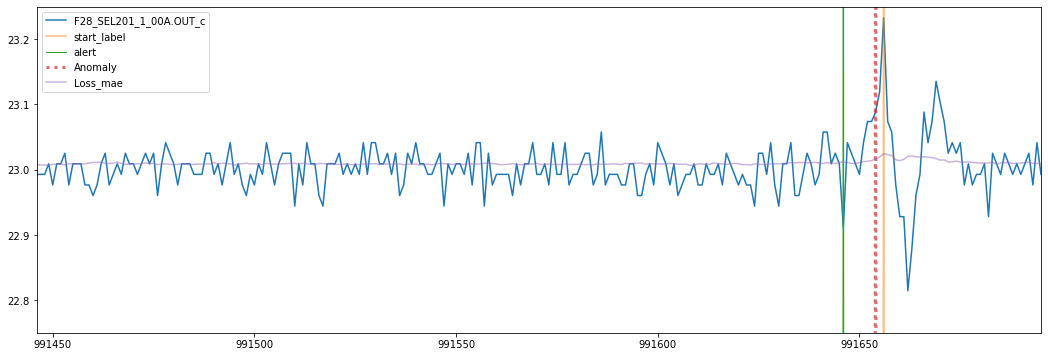

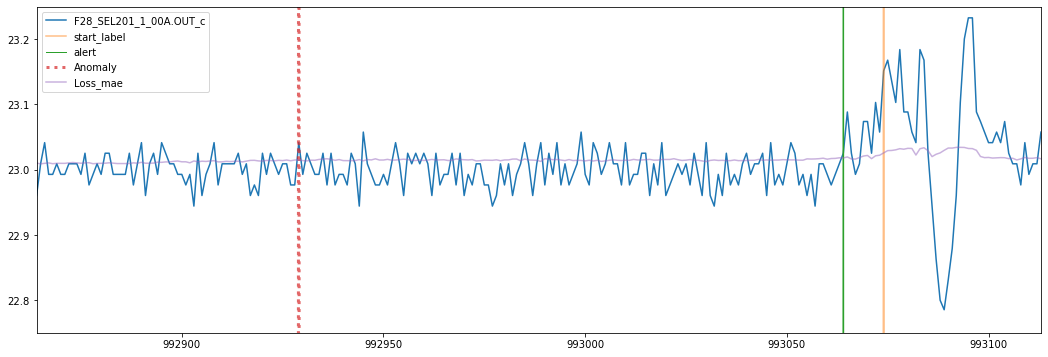

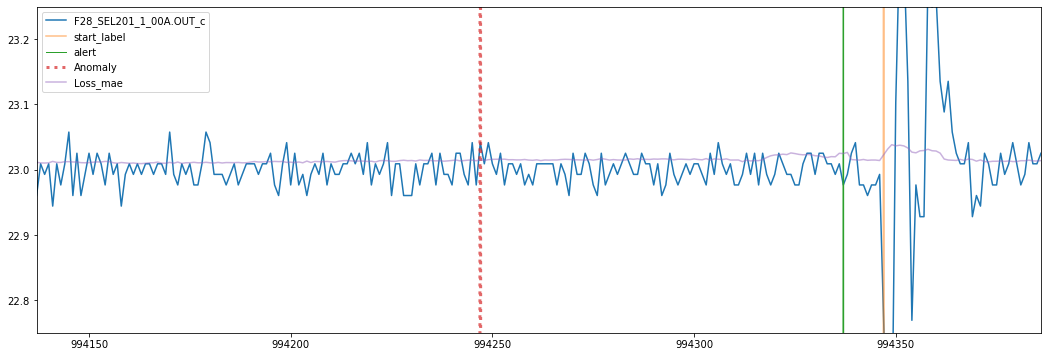

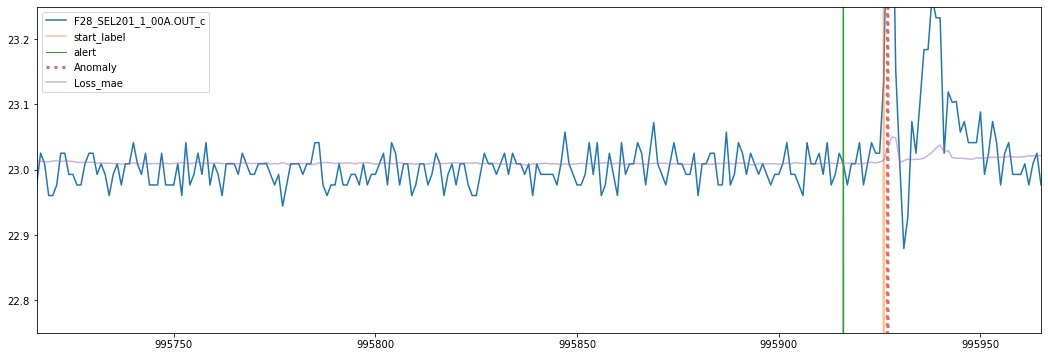

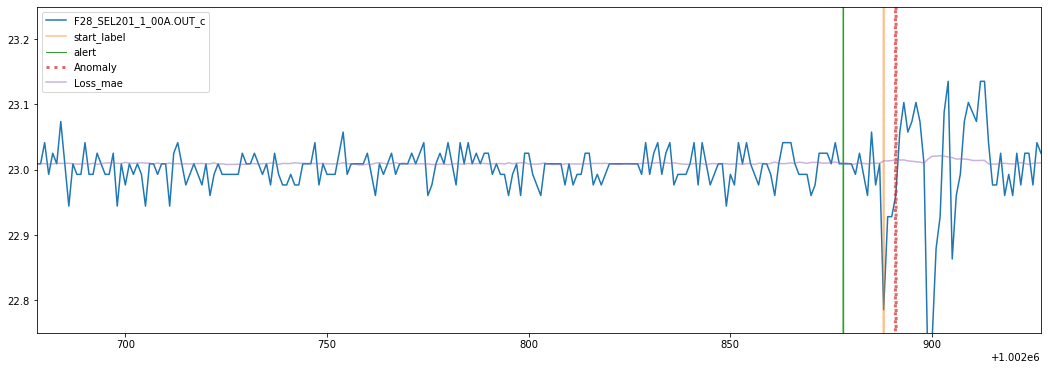

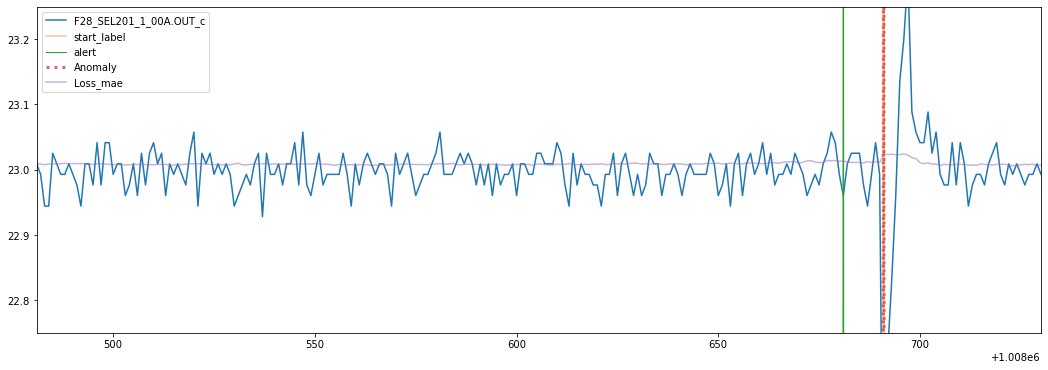

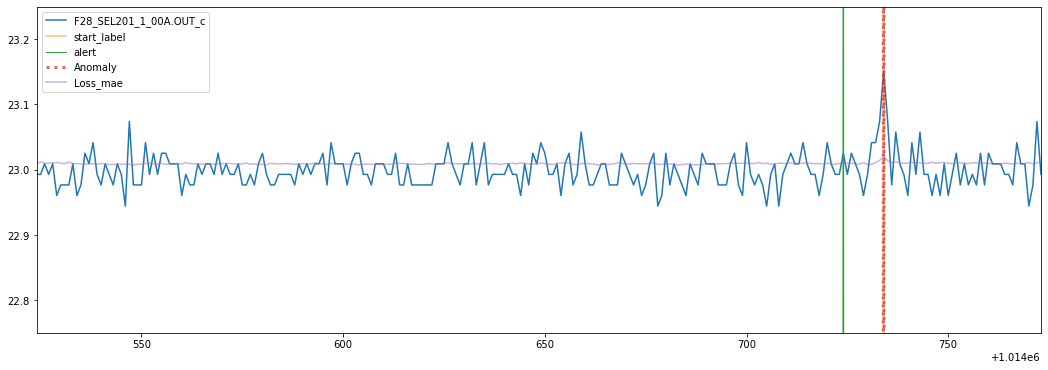

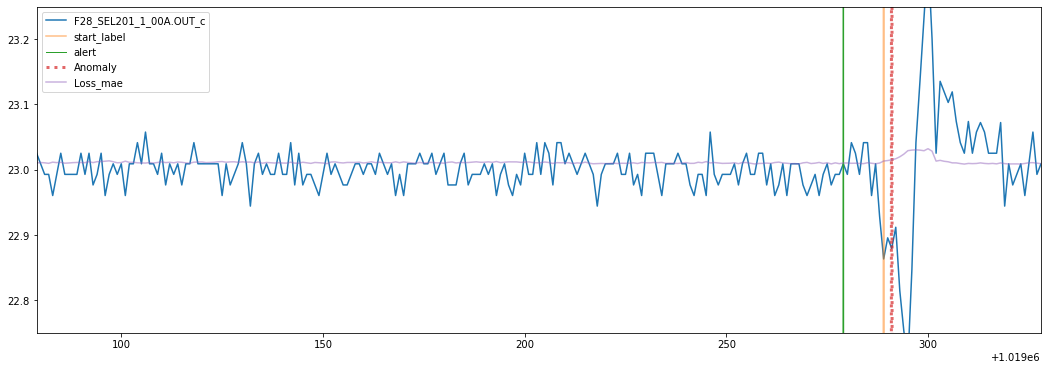

In [0]:
for v in val:
    tmp=df_new.iloc[v-200:v+50]
    tmp['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
    (tmp['start_label']*25).plot(ylim=[22.75,23.25], alpha=0.5)
    (tmp['alert']*25).plot(figsize = (18,6), alpha=1, lw=1)
    (tmp['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=0.7, lw=3, linestyle=':')
    (tmp['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
    plt.legend()
    plt.show()

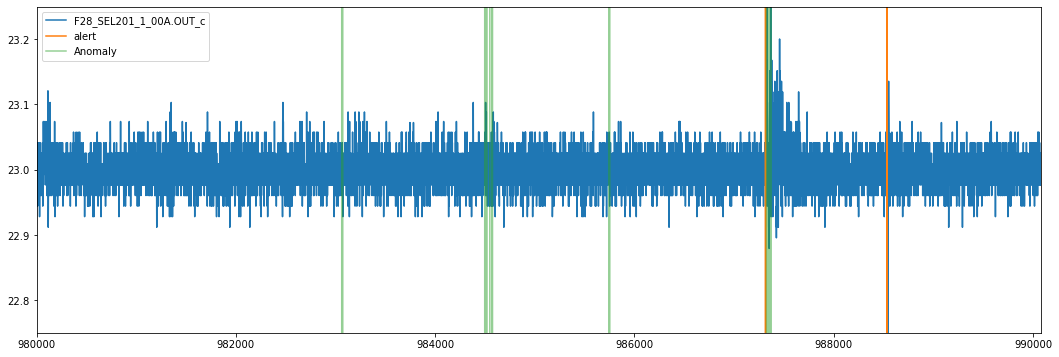

In [0]:
df_new.iloc[0:60*24*7]['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(df_new.iloc[0:60*24*7]['alert']*25).plot(figsize = (18,6), alpha=1)
(df_new.iloc[0:60*24*7]['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend()

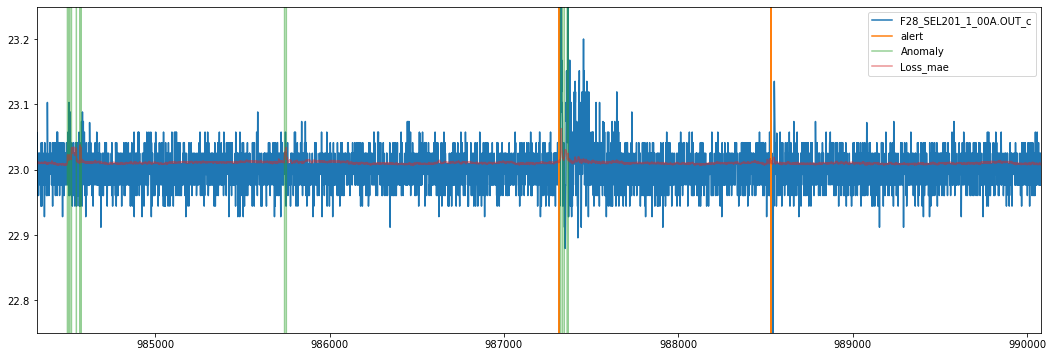

In [0]:
df_new.iloc[60*24*3:60*24*7]['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(df_new.iloc[60*24*3:60*24*7]['alert']*25).plot(figsize = (18,6), alpha=1)
(df_new.iloc[60*24*3:60*24*7]['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=0.5)
(df_new.iloc[60*24*3:60*24*7]['Loss_mae']+23).plot(ylim=[22.75,23.25], alpha=0.5)
plt.legend()

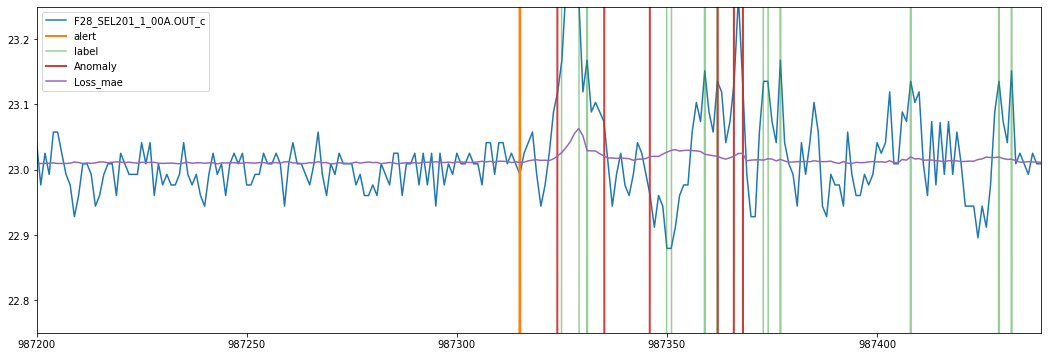

In [0]:
tmp=df_new.iloc[60*24*5:60*24*5+60*4]
tmp['F28_SEL201_1_00A.OUT_c'].plot(figsize = (18,6))
(tmp['alert']*25).plot(figsize = (18,6), alpha=1, lw=2)
(tmp['label']*25).plot(figsize = (18,6), alpha=0.5)
(tmp['Anomaly']*25).plot(ylim=[22.75,23.25], alpha=0.9, lw=2)
(tmp['Loss_mae']+23).plot(ylim=[22.75,23.25])
plt.legend()

In [0]:
X_pred.head()

,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_2_00A.OUT,...,LCC2_QY111_1_10A.DMD,LCC2_QY111_2_10A.DMD,LCC2_PDIT112_0_00A,LCC2_PDIT112_0_00B,LCC2_TIC111_0_11A.CO,LCC2_TIC111_0_11A.PV,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B
980000,0.49850,0.10013,0.02421,0.34289,0.53481,0.29736,0.35946,0.59562,0.56323,0.49993,...,0.56598,-0.00654,0.33885,0.33963,0.00017,0.62586,0.58210,0.77487,0.77480,0.89959
980001,0.49865,0.09925,0.02453,0.34744,0.53373,0.29504,0.35817,0.59601,0.56379,0.50010,...,0.56587,-0.00723,0.34033,0.34106,0.00016,0.62296,0.58482,0.77459,0.76919,0.89356
980002,0.49891,0.09737,0.02441,0.34566,0.50254,0.28937,0.33484,0.59587,0.56344,0.50039,...,0.56512,-0.00692,0.34121,0.34181,0.00010,0.62077,0.58566,0.77633,0.76758,0.89175
980003,0.49901,0.09698,0.02362,0.33897,0.47217,0.28955,0.32913,0.59580,0.56276,0.50031,...,0.56522,-0.00609,0.34191,0.34247,0.00006,0.62288,0.59272,0.77517,0.77010,0.88987
980004,0.49874,0.09653,0.02391,0.33372,0.45680,0.28656,0.32758,0.59473,0.56147,0.49980,...,0.56494,-0.00580,0.34246,0.34290,0.00001,0.62083,0.59681,0.77764,0.77605,0.89298


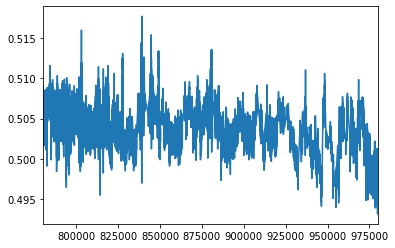

In [0]:
X_pred['F28_SEL201_1_00A.OUT_c'].plot()

In [0]:
### random forest for inference

In [0]:
### simple dense model to predict var in next 10 minutes

In [0]:
[c for c in df_all.columns if 'F28_SEL201' in c]

['F28_SEL201_1_00A.OUT_c', 'F28_SEL201_2_00A.OUT']

In [0]:
df_train.head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,...,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,label,start_label,legit,start_lable,alert,legit_lag
805000,2018-04-24 23:27:00,23.00908,1.41794,1.95982,34.28579,55.04864,29.25904,55.04233,74.49902,78.53600,...,58.96498,959.51685,23.82485,54.04499,0,0,1,0,0.00000,0
805001,2018-04-24 23:28:00,22.99287,1.41794,1.96031,34.48827,55.06485,29.22118,55.01559,74.54766,78.48736,...,58.96498,959.82489,23.82485,54.00909,0,0,1,0,0.00000,0
805002,2018-04-24 23:29:00,23.00908,1.41794,1.96031,34.63130,55.04864,29.26317,55.01573,74.35311,78.43872,...,58.96498,959.51685,23.85101,54.11772,0,0,1,0,0.00000,0
805003,2018-04-24 23:30:00,23.00908,1.41794,1.96031,34.70288,55.04864,29.42606,55.02499,74.45039,78.58463,...,58.96498,959.51685,23.85101,54.11772,0,0,1,0,0.00000,0
805004,2018-04-24 23:31:00,23.02529,1.41794,1.96031,34.81059,55.04864,29.42606,55.01536,74.35311,78.53600,...,58.96498,959.51685,23.82485,54.07664,0,0,1,0,0.00000,0


In [0]:
df_train.legit.value_counts()

1    392503
0    102497
Name: legit, dtype: int64

df_train = df_train.set_index('Timestamp')
df_train.head()

In [0]:
df_train.shape, df_train.columns[3:-6]

((495000, 49), Index(['F28_PIC201_1_00A_STD1D', 'F28_PIC201_2_00A_STD1D',
        'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV', 'F28_TIC201_1_30A.CO',
        'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A', 'F28_PIT201_2_20A',
        'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A', 'F28_PCV201_2_00A',
        'F28_PCV201_1_01C', 'F28_PCV201_2_01C', 'F28_TCV201_1_30A',
        'F28_TCV201_1_30B', 'F28_PIT112_0_01A', 'F28_PIT112_0_02A',
        'F28_PDI112_0_01', 'F28_PDIT112_0_09A', 'F28_PDIT112_0_09B',
        'F28_PDIT112_0_09C', 'F28_TCV101_0_06A', 'F28_TCV101_0_08A',
        'F28_TCV101_0_10A', 'F28_NCV101_0_11A', 'LCC2_QY112_0_00A.DMD',
        'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B', 'LCC2_FIC111_0_03A.PV',
        'LCC2_PMP111_13_00.IO.SI', 'LCC2_QY111_1_10A.DMD',
        'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A', 'LCC2_PDIT112_0_00B',
        'LCC2_TIC111_0_11A.CO', 'LCC2_TIC111_0_11A.PV', 'LC12_TI650_0_03A',
        'LC12_PI650_0_04A', 'LC12_NY650_0_03A', 'LC12_NY650_0_03B'],
      

In [0]:
# specify the number of lag hours
n_min = 80
n_features = df_train.shape[1]

keras.preprocessing.sequence.TimeseriesGenerator(data, targets, length, sampling_rate=1, 
                                                 stride=1, start_index=0, end_index=None, 
                                                 shuffle=False, reverse=False,
                                                 batch_size=128)

Arguments

* data: Indexable generator (such as list or Numpy array) containing consecutive data points (timesteps). The data should be at 2D, and axis 0 is expected to be the time dimension.
* targets: Targets corresponding to timesteps in data. It should have same length as data.
* length: Length of the output sequences (in number of timesteps).
* sampling_rate: Period between successive individual timesteps within sequences. For rate r, timesteps data[i], data[i-r], ... data[i - length] are used for create a sample sequence.
* stride: Period between successive output sequences. For stride s, consecutive output samples would be centered around data[i], data[i+s], data[i+2*s], etc.
* start_index: Data points earlier than start_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
* end_index: Data points later than end_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
* shuffle: Whether to shuffle output samples, or instead draw them in chronological order.
* reverse: Boolean: if true, timesteps in each output sample will be in reverse chronological order.
* batch_size: Number of timeseries samples in each batch (except maybe the last one).

## Split strain test

In [0]:
df_new = df_all[['F28_SEL201_1_00A.OUT_c']].copy()
df_all['target'] = df_new.shift(-10)

In [0]:
df_all=df_all.drop(df_all.columns[0], axis=1)

In [0]:
df_all[1000:].head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,...,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,label,start_label,legit,start_lable,alert,legit_lag,target
1000,2016-10-13 15:27:00,22.97917,0.00000,0.72686,13.41809,54.99727,27.55333,55.01339,73.01920,74.28719,...,999.01685,34.31549,62.73376,0,0,1,0,0.00000,0,23.01939
1001,2016-10-13 15:28:00,22.97917,0.00000,0.72686,13.41809,54.99727,27.55333,55.01339,73.01920,74.28719,...,999.01685,34.31549,62.73376,0,0,1,0,0.00000,0,23.01939
1002,2016-10-13 15:29:00,22.97917,0.00000,0.72686,13.41809,54.99727,27.55333,55.01339,73.01920,74.28719,...,999.01685,34.31549,62.73376,0,0,1,0,0.00000,0,23.01939
1003,2016-10-13 15:30:00,23.01939,0.00000,0.72686,12.31186,54.98095,27.75721,55.00527,73.01801,74.28208,...,999.08356,33.75055,61.99000,0,0,1,0,0.00000,0,23.01939
1004,2016-10-13 15:31:00,23.01939,0.00000,0.72686,12.31186,54.98095,27.75721,55.00527,73.01801,74.28208,...,999.08356,33.75055,61.99000,0,0,1,0,0.00000,0,23.01939


In [0]:
df_train=df_all.iloc[805000:1300000]

df_test=df_all.loc[1300000:1300000+60*24*30]


In [0]:
df_train_legit = df_train[df_train['legit']>0].copy()
df_train_legit.head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,...,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,label,start_label,legit,start_lable,alert,legit_lag,target
805000,2018-04-24 23:27:00,23.00908,1.41794,1.95982,34.28579,55.04864,29.25904,55.04233,74.49902,78.53600,...,959.51685,23.82485,54.04499,0,0,1,0,0.00000,0,23.02529
805001,2018-04-24 23:28:00,22.99287,1.41794,1.96031,34.48827,55.06485,29.22118,55.01559,74.54766,78.48736,...,959.82489,23.82485,54.00909,0,0,1,0,0.00000,0,23.00908
805002,2018-04-24 23:29:00,23.00908,1.41794,1.96031,34.63130,55.04864,29.26317,55.01573,74.35311,78.43872,...,959.51685,23.85101,54.11772,0,0,1,0,0.00000,0,22.97665
805003,2018-04-24 23:30:00,23.00908,1.41794,1.96031,34.70288,55.04864,29.42606,55.02499,74.45039,78.58463,...,959.51685,23.85101,54.11772,0,0,1,0,0.00000,0,23.04150
805004,2018-04-24 23:31:00,23.02529,1.41794,1.96031,34.81059,55.04864,29.42606,55.01536,74.35311,78.53600,...,959.51685,23.82485,54.07664,0,0,1,0,0.00000,0,23.07393


In [0]:
df_train.columns[1:-7]

Index(['F28_SEL201_1_00A.OUT_c', 'F28_PIC201_1_00A_STD1D',
       'F28_PIC201_2_00A_STD1D', 'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV',
       'F28_TIC201_1_30A.CO', 'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A',
       'F28_PIT201_2_20A', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_QY112_0_00A.DMD', 'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B',
       'LCC2_FIC111_0_03A.PV', 'LCC2_PMP111_13_00.IO.SI',
       'LCC2_QY111_1_10A.DMD', 'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A',
       'LCC2_PDIT112_0_00B', 'LCC2_TIC111_0_11A.CO', 'LCC2_TIC111_0_11A.PV',
       'LC12_TI650_0_03A', 'LC12_PI650_0_04A', 'LC12_NY650_0_03A',
       'LC12_NY650_0_03B'],
 

In [0]:
from sklearn import preprocessing

X = df_train_legit[df_all.columns[df_train.columns[2:-6]].values
sc = preprocessing.MinMaxScaler()
X = sc.fit(x)
X = sc.transform(X)
y=df_train_legit['target'].values
ylabel=df_train_legit['label'].values
yalert=df_train_legit['alert'].values

In [0]:
from sklearn import preprocessing

X = df_train[df_all.columns[df_train.columns[2:-6]].values
sc = preprocessing.MinMaxScaler()
X = sc.fit(x)
X = sc.transform(X)
y=df_train['target'].values
ylabel=df_train['label'].values
yalert=df_train['alert'].values

SyntaxError: invalid syntax (<ipython-input-199-d6ab55a8df36>, line 4)

In [0]:
X_val = df_test[df_test.columns[df_test.columns[2:-6]].values
sc = preprocessing.MinMaxScaler()

X_val = sc.transform(X_val)
y_val=df_all['F28_SEL201_1_00A.OUT_c'].values
ylabel_val=df_test['label'].values
yalert_val=df_test['alert'].values

In [0]:

X = df_train[df_train.columns[1:-7]].values
y=df_train['target'].values
ylabel=df_train['label'].values
yalert=df_train['alert'].values
            
X_val = df_test[df_test.columns[1:-7]].values

y_val=df_test['target'].values
ylabel_val=df_test['label'].values
yalert_val=df_test['alert'].values

In [0]:
X.shape, 495000*0.05

((495000, 41), 24750.0)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=60
train_generator = TimeseriesGenerator(data=X, targets=y, start_index=24750,
                                length=length, batch_size=16)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=60
val_generator = TimeseriesGenerator(data=X, targets=y, end_index=24750,
                                length=length, batch_size=16)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=60
test_generator = TimeseriesGenerator(data=X_val, targets=y_val, 
                                length=length, batch_size=16)

In [0]:
X.shape

(495000, 41)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.utils import np_utils # from keras import utils as np_utils

data_dim = X.shape[1]
timesteps = length


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(60*6, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(60*6, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(60*6))  # return a single vector of dimension 32
model.add(Dense(1,
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',
              optimizer='adam')


In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 360)           578880    
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 360)           1038240   
_________________________________________________________________
lstm_12 (LSTM)               (None, 360)               1038240   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 361       
Total params: 2,655,721
Trainable params: 2,655,721
Non-trainable params: 0
_________________________________________________________________


In [0]:

from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath = 'model_lstm_nomv_best1.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)

In [0]:
# fit model
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator),
                       validation_data=val_generator,validation_steps=len(val_generator),       
                    epochs=50, verbose=1, 
                              callbacks=[early_stopping, checkpointer,reduce_lr])

Epoch 1/50
29387/29387 [==============================] - 5126s 174ms/step - loss: 0.0023 - val_loss: 6.6838e-04

Epoch 00001: val_loss improved from inf to 0.00067, saving model to model_lstm_nomv_best1.hdf5
Epoch 2/50
 2118/29387 [=>............................] - ETA: 1:16:23 - loss: 0.0021

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# define generator
n_input = 2
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=1)
# number of samples
print('Samples: %d' % len(generator))
# print each sample
for i in range(len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

Samples: 8
[[1 2]] => [3]
[[2 3]] => [4]
[[3 4]] => [5]
[[4 5]] => [6]
[[5 6]] => [7]
[[6 7]] => [8]
[[7 8]] => [9]
[[8 9]] => [10]


In [0]:
n_input=length
n_features=42
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# fit model
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=5, verbose=1)

Epoch 1/5
12961/12961 [==============================] - 139s 11ms/step - loss: 0.0619 - accuracy: 0.9886
Epoch 2/5
12961/12961 [==============================] - 142s 11ms/step - loss: 0.0543 - accuracy: 0.9887
Epoch 3/5
12961/12961 [==============================] - 142s 11ms/step - loss: 0.0466 - accuracy: 0.9886
Epoch 4/5
12961/12961 [==============================] - 142s 11ms/step - loss: 0.0418 - accuracy: 0.9887
Epoch 5/5
12961/12961 [==============================] - 142s 11ms/step - loss: 0.0411 - accuracy: 0.9891


In [0]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 100)               57200     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 202       
Total params: 57,402
Trainable params: 57,402
Non-trainable params: 0
_________________________________________________________________


In [0]:
xo.shape,predi.shape

((120, 10, 42), (120,))

In [0]:
pred=model.predict(xo)

In [0]:
predi=np.argmax(pred, axis=1)
predi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Test legit

In [0]:
df_train.columns[2:-6]

Index(['F28_PIC201_1_00A_STD1D', 'F28_PIC201_2_00A_STD1D',
       'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV', 'F28_TIC201_1_30A.CO',
       'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A', 'F28_PIT201_2_20A',
       'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A', 'F28_PCV201_2_00A',
       'F28_PCV201_1_01C', 'F28_PCV201_2_01C', 'F28_TCV201_1_30A',
       'F28_TCV201_1_30B', 'F28_PIT112_0_01A', 'F28_PIT112_0_02A',
       'F28_PDI112_0_01', 'F28_PDIT112_0_09A', 'F28_PDIT112_0_09B',
       'F28_PDIT112_0_09C', 'F28_TCV101_0_06A', 'F28_TCV101_0_08A',
       'F28_TCV101_0_10A', 'F28_NCV101_0_11A', 'LCC2_QY112_0_00A.DMD',
       'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B', 'LCC2_FIC111_0_03A.PV',
       'LCC2_PMP111_13_00.IO.SI', 'LCC2_QY111_1_10A.DMD',
       'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A', 'LCC2_PDIT112_0_00B',
       'LCC2_TIC111_0_11A.CO', 'LCC2_TIC111_0_11A.PV', 'LC12_TI650_0_03A',
       'LC12_PI650_0_04A', 'LC12_NY650_0_03A', 'LC12_NY650_0_03B'],
      dtype='object')

In [0]:
from sklearn import preprocessing

X = df_train[df_train.columns[1:-6]].values
sc = preprocessing.MinMaxScaler()
print(X.shape)
sc.fit(X)
print(X.shape)
X = sc.transform(X)
X_test = sc.transform(df_test[df_train.columns[1:-6]].values)

(80000, 41)
(80000, 41)


In [0]:
legit=df_train['legit'].values
legit.shape, X[:-10].shape,X.shape

((80000,), (79990, 41), (80000, 41))

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.utils import np_utils # from keras import utils as np_utils

length=120
gen_legit = TimeseriesGenerator(data=X[:-10,:], targets=np_utils.to_categorical(legit[10:]),
                                length=120, batch_size=32)

In [0]:
n_input=120
n_features=X_train.shape[1]
model = Sequential()
model.add(LSTM(120, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['acc'])

In [0]:
model.fit_generator(gen_legit, steps_per_epoch=len(generator), epochs=10, verbose=1,
                    callbacks=[early_stopping, checkpointer])

Epoch 1/10
2102/2102 [==============================] - 463s 220ms/step - loss: 2.4854 - acc: 0.8418
Epoch 2/10
2102/2102 [==============================] - 461s 219ms/step - loss: 2.5455 - acc: 0.8421
Epoch 3/10
2102/2102 [==============================] - 459s 218ms/step - loss: 2.4152 - acc: 0.8502
Epoch 4/10
2102/2102 [==============================] - 462s 220ms/step - loss: 2.6217 - acc: 0.8373
Epoch 5/10
2102/2102 [==============================] - 468s 222ms/step - loss: 2.5355 - acc: 0.8427
Epoch 6/10
2102/2102 [==============================] - 465s 221ms/step - loss: 2.5225 - acc: 0.8435
Epoch 7/10
2102/2102 [==============================] - 463s 220ms/step - loss: 2.4801 - acc: 0.8461
Epoch 8/10
2102/2102 [==============================] - 467s 222ms/step - loss: 2.5412 - acc: 0.8423
Epoch 9/10
2102/2102 [==============================] - 467s 222ms/step - loss: 2.5448 - acc: 0.8421
Epoch 10/10
2102/2102 [==============================] - 468s 223ms/step - loss: 2.3339 - a

In [0]:
gen_test = TimeseriesGenerator(data=X_test[:-10,:], targets=np_utils.to_categorical(df_test['legit'].values[10:]),
                              length=120, batch_size=32)

NameError: ignored

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics=['acc'])

In [0]:
model.fit_generator(gen_legit, steps_per_epoch=len(generator), epochs=10, verbose=1,
                    callbacks=[early_stopping, checkpointer])

Epoch 1/10
2102/2102 [==============================] - 475s 226ms/step - loss: 2.5086 - acc: 0.8444
Epoch 2/10
2102/2102 [==============================] - 473s 225ms/step - loss: 2.4554 - acc: 0.8477
Epoch 3/10
2102/2102 [==============================] - 472s 225ms/step - loss: 2.6876 - acc: 0.8333
Epoch 4/10
2102/2102 [==============================] - 467s 222ms/step - loss: 2.5151 - acc: 0.8440
Epoch 5/10
2102/2102 [==============================] - 464s 221ms/step - loss: 2.4492 - acc: 0.8480
Epoch 6/10
2102/2102 [==============================] - 471s 224ms/step - loss: 2.5606 - acc: 0.8411
Epoch 7/10
2102/2102 [==============================] - 471s 224ms/step - loss: 2.5089 - acc: 0.8443
Epoch 8/10
2102/2102 [==============================] - 471s 224ms/step - loss: 2.4681 - acc: 0.8469
Epoch 9/10
2102/2102 [==============================] - 470s 224ms/step - loss: 2.5223 - acc: 0.8435
Epoch 10/10
2102/2102 [==============================] - 472s 224ms/step - loss: 2.5019 - a

# Test 1

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=120
generator = TimeseriesGenerator(data=X_train[:-1,:], targets=X_train[1:,0],
                                length=120, batch_size=32)

In [0]:
n_input=120
n_features=X_train.shape[1]
model = Sequential()
model.add(LSTM(120, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['acc'])

In [0]:
x,y=generator[5]
x.shape,y.shape

((32, 120, 41), (32,))

In [0]:
n_input=120
n_features=X_train.shape[1]
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', 
              loss='mse')
# fit model
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=5, verbose=1)

Epoch 1/5
2102/2102 [==============================] - 465s 221ms/step - loss: 0.0154
Epoch 2/5
2102/2102 [==============================] - 466s 222ms/step - loss: 0.0141
Epoch 3/5
2102/2102 [==============================] - 463s 220ms/step - loss: 0.0140
Epoch 4/5
2102/2102 [==============================] - 466s 221ms/step - loss: 0.0140
Epoch 5/5
2102/2102 [==============================] - 465s 221ms/step - loss: 0.0139


In [0]:
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=10, verbose=1)

Epoch 1/10
2102/2102 [==============================] - 462s 220ms/step - loss: 0.0139
Epoch 2/10
2102/2102 [==============================] - 456s 217ms/step - loss: 0.0137
Epoch 3/10
2102/2102 [==============================] - 460s 219ms/step - loss: 0.0137
Epoch 4/10
2102/2102 [==============================] - 464s 221ms/step - loss: 0.0136
Epoch 5/10
2102/2102 [==============================] - 467s 222ms/step - loss: 0.0135
Epoch 6/10
2102/2102 [==============================] - 464s 221ms/step - loss: 0.0135
Epoch 7/10
2102/2102 [==============================] - 459s 219ms/step - loss: 0.0146
Epoch 8/10
2102/2102 [==============================] - 461s 219ms/step - loss: 0.0140
Epoch 9/10
2102/2102 [==============================] - 460s 219ms/step - loss: 0.0136
Epoch 10/10
2102/2102 [==============================] - 461s 219ms/step - loss: 0.0135


In [0]:
from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='loss', patience=9)
checkpointer = ModelCheckpoint(filepath = PATH+'model_lstm_nomv_1201.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True, monitor='loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)

In [0]:
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=10, verbose=1,
                    callbacks=[early_stopping, checkpointer])

Epoch 1/10
2102/2102 [==============================] - 449s 214ms/step - loss: 0.0135
Epoch 2/10
2102/2102 [==============================] - 449s 214ms/step - loss: 0.0135
Epoch 3/10
2102/2102 [==============================] - 449s 214ms/step - loss: 0.0135
Epoch 4/10
2102/2102 [==============================] - 448s 213ms/step - loss: 0.0135
Epoch 5/10
2102/2102 [==============================] - 449s 213ms/step - loss: 0.0135
Epoch 6/10
2102/2102 [==============================] - 452s 215ms/step - loss: 0.0134
Epoch 7/10
2102/2102 [==============================] - 450s 214ms/step - loss: 0.0135
Epoch 8/10
2102/2102 [==============================] - 449s 214ms/step - loss: 0.0135
Epoch 9/10
2102/2102 [==============================] - 449s 213ms/step - loss: 0.0135
Epoch 10/10
2102/2102 [==============================] - 448s 213ms/step - loss: 0.0134


In [0]:
model.save_weights('model_lstm_train_all.hdf5')

In [0]:
test_gen = TimeseriesGenerator(data=X_test[:-1,:], targets=X_test[1:,0],
                                length=120, batch_size=10)

In [0]:
pred=model.predict(test_gen)

KeyboardInterrupt: ignored

In [0]:
x,y=test_gen[0]
x.shape,y.shape

((1, 120, 41), (1,))

In [0]:
df_test.iloc[118,1:4]

F28_SEL201_1_00A.OUT_c     22.9929
F28_PIC201_1_00A_STD1D     1.43351
F28_PIC201_2_00A_STD1D    0.913313
Name: 118, dtype: object

In [0]:
df_test.iloc[119,1:4]

F28_SEL201_1_00A.OUT_c     22.9604
F28_PIC201_1_00A_STD1D     1.43351
F28_PIC201_2_00A_STD1D    0.913313
Name: 119, dtype: object

In [0]:
X_test_inv=sc.inverse_transform(X_test)
X_test_inv.shape

(25000, 41)

In [0]:
X_test_inv[118,0:3],X_test_inv[119,0:3],X_test_inv[120,0:3],X_test_inv[121,0:3],

(array([22.99286652,  1.43351495,  0.91331291]),
 array([22.96044159,  1.43351495,  0.91331291]),
 array([23.02529144,  1.43351495,  0.9050433 ]),
 array([22.97665405,  1.43351495,  0.9050433 ]))

In [0]:
df_test.iloc[119:].shape

(24881, 48)

In [0]:
X_test[118,0:3],X_test[119,0:3],X_test[120,0:3],X_test[121,0:3],

(array([0.4347789 , 0.01849892, 0.06703591]),
 array([0.2898526 , 0.01849892, 0.06703591]),
 array([0.5797052 , 0.01849892, 0.06414924]),
 array([0.36231575, 0.01849892, 0.06414924]))

In [0]:
x[0,0,0:3],x[0,1,0:3],x[0,2,0:3],x[0,3,0:3],x[0,118,0:3],x[0,119,0:3],y

(array([0.4347789 , 0.01805016, 0.06897425]),
 array([0.21738945, 0.01805016, 0.06897425]),
 array([0.5797052 , 0.01805016, 0.06897425]),
 array([0.4347789 , 0.01805016, 0.06897425]),
 array([0.4347789 , 0.01849892, 0.06703591]),
 array([0.2898526 , 0.01849892, 0.06703591]),
 array([0.36231575]))

In [0]:
pred[0:3,0]

array([0.47330227, 0.48839423, 0.48754016], dtype=float32)

In [0]:
pred0=model.predict(X_test[0:120,:].reshape(1,120,41))

In [0]:
pred0

array([[0.47330233]], dtype=float32)

In [0]:
pred1=model.predict(X_test[1:121,:].reshape(1,120,41))

In [0]:
df_test.head()

,Timestamp,F28_SEL201_1_00A.OUT_c,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_2_00A.OUT,F28_PCV201_1_00A,F28_PCV201_2_00A,F28_PCV201_1_01C,F28_PCV201_2_01C,F28_TCV201_1_30A,F28_TCV201_1_30B,F28_PIT112_0_01A,F28_PIT112_0_02A,F28_PDI112_0_01,F28_PDIT112_0_09A,F28_PDIT112_0_09B,F28_PDIT112_0_09C,F28_TCV101_0_06A,F28_TCV101_0_08A,F28_TCV101_0_10A,F28_NCV101_0_11A,LCC2_QY112_0_00A.DMD,LCC2_TET112_0_06A,LCC2_TET112_0_06B,LCC2_FIC111_0_03A.PV,LCC2_PMP111_13_00.IO.SI,LCC2_QY111_1_10A.DMD,LCC2_QY111_2_10A.DMD,LCC2_PDIT112_0_00A,LCC2_PDIT112_0_00B,LCC2_TIC111_0_11A.CO,LCC2_TIC111_0_11A.PV,LC12_TI650_0_03A,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,label,start_label,legit,start_lable,alert,legit_lag,pred
0,2019-03-17 08:47:00,22.992867,1.428015,0.918866,44.836418,55.048637,49.032642,55.039574,74.596306,79.207199,23.009079,0.599074,0.945924,0.0,0.0,49.035645,26.0,68.589493,50.228596,18.360897,19.962711,19.873055,21.005674,21.4,87.610962,159.541351,237.591736,1.5,40.116730,39.542801,740.434509,0.0,5.0,2.0,21.952011,22.046045,38.5,14.788814,52.081718,996.397461,19.823118,46.724140,0,0,1,0,0.0,0,0.0
1,2019-03-17 08:48:00,22.944229,1.428015,0.918866,45.000240,55.032425,49.186069,55.033955,74.547661,79.207199,23.009079,1.009898,0.961245,0.0,0.0,49.197201,26.0,68.589493,50.277241,18.409534,19.928665,19.861706,20.971626,18.5,86.243401,160.138107,238.249496,1.5,40.246433,39.604412,751.621277,0.0,5.0,2.0,21.887159,22.013618,38.5,14.670326,52.081718,996.397461,19.726801,46.428402,0,0,1,0,0.0,0,0.0
2,2019-03-17 08:49:00,23.025291,1.428015,0.918866,45.170532,55.048637,49.413803,55.039326,74.737350,79.255836,23.009079,0.739636,0.894612,0.0,0.0,49.418945,26.0,68.638130,50.228596,18.409534,19.905968,19.816311,21.049934,17.0,88.245010,160.524551,242.927780,1.5,40.149158,39.542801,661.964966,0.0,5.0,2.0,21.952011,22.013618,38.5,15.351802,52.276276,996.397461,19.849617,46.706150,0,0,1,0,0.0,0,0.0
3,2019-03-17 08:50:00,22.992867,1.428015,0.918866,45.107738,55.000000,49.596058,55.034424,74.834625,79.353111,22.992867,0.877280,1.229659,0.0,0.0,49.569458,26.0,68.681908,50.277241,18.453312,19.827660,19.816311,21.095329,17.0,96.176407,160.575180,247.430801,1.5,40.149158,39.604412,617.217896,0.0,5.0,2.0,22.046045,22.046045,38.5,15.864528,52.276276,996.397461,19.842123,46.622692,0,0,1,0,0.0,0,0.0
4,2019-03-17 08:51:00,23.009079,1.426292,0.918866,45.066742,54.983788,49.620720,55.024517,74.596306,79.353111,23.009079,1.038189,1.245320,0.0,0.0,49.635571,26.0,68.730545,50.325878,18.453312,19.995623,19.894619,21.162291,17.0,101.428474,160.639969,244.701660,1.5,40.116730,39.510376,665.207520,0.0,5.0,2.0,22.046045,22.078470,38.5,15.429746,52.276276,996.397461,19.833584,46.591984,0,0,1,0,0.0,0,0.0


In [0]:
df_test.iloc[119:-2].shape,pred[:,0].shape,df_test.loc[119:len(df_test)-3, ('pred')].shape

((24879, 49), (24879,), (24879,))

In [0]:
df_test['pred']=0
df_test.loc[119:len(df_test)-3, ('pred')]=pred[:,0]
df_test['targetsc']=sc.transform(df_test[df_test.columns[1:-7]].values)[:,0]

In [0]:
pred.shape,X_test.shape, 24879-25000,pred1

((24879, 1), (25000, 41), -121, array([[0.4883942]], dtype=float32))

In [0]:
df_test[]

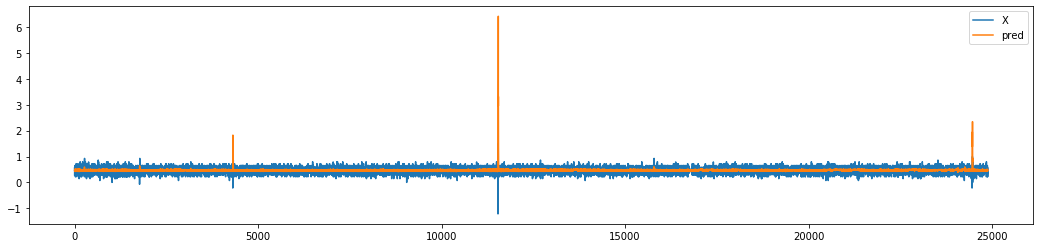

In [0]:
plt.figure(figsize=(18,4))
plt.plot(X_test[119:,0])
plt.plot(pred[:,0])
plt.legend(['X','pred'])

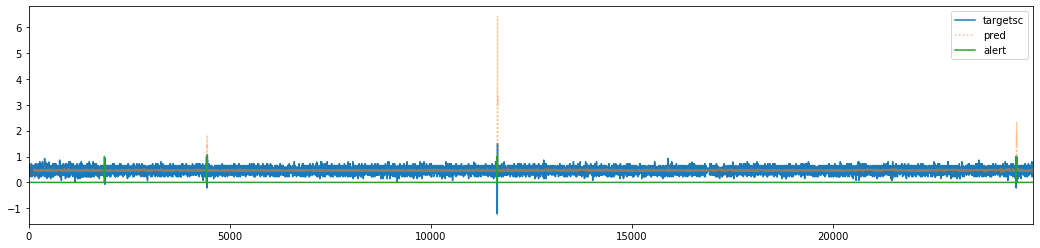

In [0]:
plt.figure(figsize=(18,4))
#df_test['F28_SEL201_1_00A.OUT_c'],plot()
df_test['targetsc'].plot()
df_test['pred'].plot(alpha=0.5, linestyle=':')
df_test['alert'].plot(alpha=1)

plt.legend()

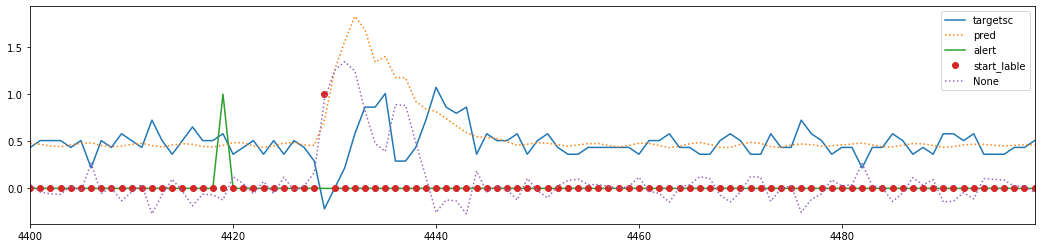

In [0]:
plt.figure(figsize=(18,4))
tmp=df_test.iloc[4400:4500]
#df_test['F28_SEL201_1_00A.OUT_c'],plot()
tmp['targetsc'].plot()
#df_test['F28_SEL201_1_00A.OUT_c'],plot()
tmp['pred'].plot(alpha=1, linestyle=':')
tmp['alert'].plot()
tmp['start_lable'].plot(linestyle='None', marker='o')
(tmp['pred']-tmp['targetsc']).plot(alpha=1, linestyle=':')
plt.legend()

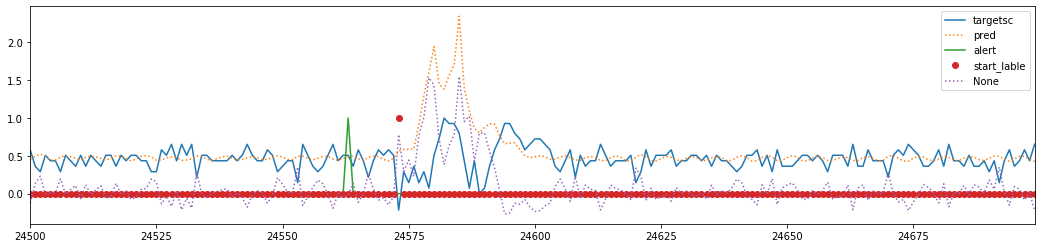

In [0]:
plt.figure(figsize=(18,4))
tmp=df_test.iloc[24500:24700]
#df_test['F28_SEL201_1_00A.OUT_c'],plot()
tmp['targetsc'].plot()
#df_test['F28_SEL201_1_00A.OUT_c'],plot()
tmp['pred'].plot(alpha=1, linestyle=':')
tmp['alert'].plot()
tmp['start_lable'].plot(linestyle='None', marker='o')
(tmp['pred']-tmp['targetsc']).plot(alpha=1, linestyle=':')
plt.legend()

In [0]:
plt.figure(figsize=(18,4))
tmp=df_test.iloc[4200:4600]
#df_test['F28_SEL201_1_00A.OUT_c'],plot()
tmp['targetsc'].plot()
#df_test['F28_SEL201_1_00A.OUT_c'],plot()
tmp['pred'].plot(alpha=1, linestyle=':')
tmp['alert'].plot()
tmp['start_lable'].plot(linestyle='None', marker='o')

plt.legend()

## Test mooving avarge

In [0]:
df_all.columns[1:-6]

Index(['F28_PIC201_1_00A_STD1D', 'F28_PIC201_2_00A_STD1D',
       'F28_TIC201_2_30A.CO', 'F28_TIC201_2_30A.PV', 'F28_TIC201_1_30A.CO',
       'F28_TIC201_1_30A.PV', 'F28_PIT201_2_31A', 'F28_PIT201_2_20A',
       'F28_SEL201_1_00A.OUT_x', 'F28_SEL201_2_00A.OUT', 'F28_PCV201_1_00A',
       'F28_PCV201_2_00A', 'F28_PCV201_1_01C', 'F28_PCV201_2_01C',
       'F28_TCV201_1_30A', 'F28_TCV201_1_30B', 'F28_PIT112_0_01A',
       'F28_PIT112_0_02A', 'F28_PDI112_0_01', 'F28_PDIT112_0_09A',
       'F28_PDIT112_0_09B', 'F28_PDIT112_0_09C', 'F28_TCV101_0_06A',
       'F28_TCV101_0_08A', 'F28_TCV101_0_10A', 'F28_NCV101_0_11A',
       'LCC2_QY112_0_00A.DMD', 'LCC2_TET112_0_06A', 'LCC2_TET112_0_06B',
       'LCC2_FIC111_0_03A.PV', 'LCC2_PMP111_13_00.IO.SI',
       'LCC2_QY111_1_10A.DMD', 'LCC2_QY111_2_10A.DMD', 'LCC2_PDIT112_0_00A',
       'LCC2_PDIT112_0_00B', 'LCC2_TIC111_0_11A.CO', 'LCC2_TIC111_0_11A.PV',
       'LC12_TI650_0_03A', 'LC12_PI650_0_04A', 'LC12_NY650_0_03A',
       'LC12_NY650_0_03B', 'F

In [0]:
cols=df_all.columns[1:-6]
for i,c in enumerate(cols):
    print(c)
    df_all.insert(i+1, c+'_mvd', df_all[c].rolling(60*24).mean() - df_all[c])
    df_all[c+'_mvd'] = df_all[c+'_mvd'] - df_all[c+'_mvd'].mean()

    stdn = df_all[c+'_mvd'].std()
    df_all.loc[(df_all[c+'_mvd'] > 3*stdn), c+'_mvd'] = 3.2*stdn
    df_all.loc[(df_all[c+'_mvd'] < -3*stdn), c+'_mvd'] = -3.2*stdn


F28_PIC201_1_00A_STD1D
F28_PIC201_2_00A_STD1D
F28_TIC201_2_30A.CO
F28_TIC201_2_30A.PV
F28_TIC201_1_30A.CO
F28_TIC201_1_30A.PV
F28_PIT201_2_31A
F28_PIT201_2_20A
F28_SEL201_1_00A.OUT_x
F28_SEL201_2_00A.OUT
F28_PCV201_1_00A
F28_PCV201_2_00A
F28_PCV201_1_01C
F28_PCV201_2_01C
F28_TCV201_1_30A
F28_TCV201_1_30B
F28_PIT112_0_01A
F28_PIT112_0_02A
F28_PDI112_0_01
F28_PDIT112_0_09A
F28_PDIT112_0_09B
F28_PDIT112_0_09C
F28_TCV101_0_06A
F28_TCV101_0_08A
F28_TCV101_0_10A
F28_NCV101_0_11A
LCC2_QY112_0_00A.DMD
LCC2_TET112_0_06A
LCC2_TET112_0_06B
LCC2_FIC111_0_03A.PV
LCC2_PMP111_13_00.IO.SI
LCC2_QY111_1_10A.DMD
LCC2_QY111_2_10A.DMD
LCC2_PDIT112_0_00A
LCC2_PDIT112_0_00B
LCC2_TIC111_0_11A.CO
LCC2_TIC111_0_11A.PV
LC12_TI650_0_03A
LC12_PI650_0_04A
LC12_NY650_0_03A
LC12_NY650_0_03B
F28_SEL201_1_00A.OUT_y


In [0]:
df_all.columns[1:-6]

Index(['F28_PIC201_1_00A_STD1D_mvd', 'F28_PIC201_2_00A_STD1D_mvd',
       'F28_TIC201_2_30A.CO_mvd', 'F28_TIC201_2_30A.PV_mvd',
       'F28_TIC201_1_30A.CO_mvd', 'F28_TIC201_1_30A.PV_mvd',
       'F28_PIT201_2_31A_mvd', 'F28_PIT201_2_20A_mvd',
       'F28_SEL201_1_00A.OUT_x_mvd', 'F28_SEL201_2_00A.OUT_mvd',
       'F28_PCV201_1_00A_mvd', 'F28_PCV201_2_00A_mvd', 'F28_PCV201_1_01C_mvd',
       'F28_PCV201_2_01C_mvd', 'F28_TCV201_1_30A_mvd', 'F28_TCV201_1_30B_mvd',
       'F28_PIT112_0_01A_mvd', 'F28_PIT112_0_02A_mvd', 'F28_PDI112_0_01_mvd',
       'F28_PDIT112_0_09A_mvd', 'F28_PDIT112_0_09B_mvd',
       'F28_PDIT112_0_09C_mvd', 'F28_TCV101_0_06A_mvd', 'F28_TCV101_0_08A_mvd',
       'F28_TCV101_0_10A_mvd', 'F28_NCV101_0_11A_mvd',
       'LCC2_QY112_0_00A.DMD_mvd', 'LCC2_TET112_0_06A_mvd',
       'LCC2_TET112_0_06B_mvd', 'LCC2_FIC111_0_03A.PV_mvd',
       'LCC2_PMP111_13_00.IO.SI_mvd', 'LCC2_QY111_1_10A.DMD_mvd',
       'LCC2_QY111_2_10A.DMD_mvd', 'LCC2_PDIT112_0_00A_mvd',
       'LCC2_PDI

In [0]:
from sklearn import preprocessing

x = df_all[df_all.columns[1:-6]].values #returns a numpy array
sc = preprocessing.StandardScaler()
X = sc.fit_transform(x)

In [0]:
y_label=df_all['label'].values
print(y_label.shape)
y_shift_label = np.zeros(y_label.shape, dtype=np.int)
print(y_shift_label.shape)
y_shift_label[:-5]=y_label[5:]

(1555238,)
(1555238,)


In [0]:


y_alert=df_all['alert'].values
y_shift_alert = np.zeros(y_alert.shape, dtype=np.int)
y_shift_alert[:-5]=y_alert[5:]

In [0]:
model_train_period = 60*24*30*6*2
length = 60*3
batch_size = 60

In [0]:
X.shape,  y_shift_label.shape

((1555238, 84), (1555238,))

In [0]:
x.shape[0]/129600

0.000462962962962963

In [0]:
X_train.shape

(100000, 42)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.utils import np_utils
length=120
train_gen = TimeseriesGenerator(data=X, 
                                targets=np_utils.to_categorical(y_shift_label, num_classes=2), 
                                end_index=model_train_period,
                                shuffle=True,
                                length=length, 
                                batch_size=batch_size)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=120
test_gen = TimeseriesGenerator(data=X, 
                                targets=np_utils.to_categorical(y_shift_label, num_classes=2), 
                                start_index=model_train_period,
                                end_index=model_train_period+60*24*30*3,
                                shuffle=True,
                                length=length, 
                                batch_size=batch_size*4)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
bsize=60*24*30
val_gen = TimeseriesGenerator(data=X, 
                                targets=np_utils.to_categorical(y_shift_label, num_classes=2), 
                                start_index=model_train_period,
                                end_index=model_train_period+60*24*30,
                                #stride=bsize,
                                #shuffle=True,
                                length=length, 
                                batch_size=bsize)

In [0]:
from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath = 'model_lstm_0_259200.best.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)

In [0]:
n_input=length
n_features=X.shape[1]
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
n_input,n_features

(120, 84)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.utils import np_utils # from keras import utils as np_utils

data_dim = 42
timesteps = 360
num_classes = 2

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(60*2, return_sequences=True,
               input_shape=(n_input, n_features)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(60*2, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(60*2))  # return a single vector of dimension 32
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
# fit model
history = model.fit_generator(train_gen, steps_per_epoch=len(train_gen), 
                              validation_data=test_gen, validation_steps=4,
                              epochs=2, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/2
8639/8639 [==============================] - 2517s 291ms/step - loss: nan - accuracy: 0.9831 - val_loss: nan - val_accuracy: 0.9948

Epoch 00001: val_loss did not improve from 0.01702
Epoch 2/2
8639/8639 [==============================] - 2510s 291ms/step - loss: nan - accuracy: 0.9830 - val_loss: nan - val_accuracy: 0.9927

Epoch 00002: val_loss did not improve from 0.01702


In [0]:
# fit model
history = model.fit_generator(train_gen, steps_per_epoch=len(train_gen), 
                              validation_data=test_gen, validation_steps=4,
                              epochs=5, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/5
8639/8639 [==============================] - 806s 93ms/step - loss: 0.1422 - accuracy: 0.9828 - val_loss: 0.0176 - val_accuracy: 0.9917

Epoch 00001: val_loss improved from inf to 0.01755, saving model to model_lstm_0_259200.best.hdf5
Epoch 2/5
8639/8639 [==============================] - 820s 95ms/step - loss: 0.0868 - accuracy: 0.9828 - val_loss: 0.0339 - val_accuracy: 0.9958

Epoch 00002: val_loss did not improve from 0.01755
Epoch 3/5
8639/8639 [==============================] - 834s 96ms/step - loss: 0.0861 - accuracy: 0.9830 - val_loss: 0.0170 - val_accuracy: 0.9948

Epoch 00003: val_loss improved from 0.01755 to 0.01702, saving model to model_lstm_0_259200.best.hdf5
Epoch 4/5
8639/8639 [==============================] - 801s 93ms/step - loss: 0.0857 - accuracy: 0.9831 - val_loss: 0.0336 - val_accuracy: 0.9927

Epoch 00004: val_loss did not improve from 0.01702
Epoch 5/5
8639/8639 [==============================] - 795s 92ms/step - loss: 0.0862 - accuracy: 0.9830 - val_

In [0]:
# fit model
history = model.fit_generator(train_gen, steps_per_epoch=len(train_gen), 
                              validation_data=test_gen, validation_steps=4,
                              epochs=2, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/2
8639/8639 [==============================] - 794s 92ms/step - loss: 0.0851 - accuracy: 0.9833 - val_loss: 0.0336 - val_accuracy: 0.9948

Epoch 00001: val_loss did not improve from 0.01702
Epoch 2/2
8639/8639 [==============================] - 776s 90ms/step - loss: 0.0862 - accuracy: 0.9830 - val_loss: 0.0340 - val_accuracy: 0.9958

Epoch 00002: val_loss did not improve from 0.01702


In [0]:
# fit model
history = model.fit_generator(train_gen, steps_per_epoch=len(train_gen), 
                              validation_data=test_gen, validation_steps=4,
                              epochs=2, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/2
8639/8639 [==============================] - 802s 93ms/step - loss: 0.0865 - accuracy: 0.9829 - val_loss: 0.0171 - val_accuracy: 0.9917

Epoch 00001: val_loss did not improve from 0.01702
Epoch 2/2
8639/8639 [==============================] - 808s 94ms/step - loss: 0.0856 - accuracy: 0.9831 - val_loss: 0.0678 - val_accuracy: 0.9917

Epoch 00002: val_loss did not improve from 0.01702


In [0]:
x_val,y_val = val_gen[0]

In [0]:
np.argmax(y_val, axis=1).sum()

673

In [0]:
y_pred = model.predict(x_val)

In [0]:
np.argmax(y_pred, axis=1).sum()

0

In [0]:
model.load_weights('model_lstm_0_259200.best.hdf5')

In [0]:
y_pred = model.predict(x_val)

In [0]:
y_pred[::35]

array([[0.98312515, 0.01687482],
       [0.98312515, 0.01687482],
       [0.98312515, 0.01687482],
       ...,
       [0.98312515, 0.01687482],
       [0.98312515, 0.01687482],
       [0.98312515, 0.01687482]], dtype=float32)

In [0]:
df_all.alert.value_counts()

0.00000    1554755
1.00000        483
Name: alert, dtype: int64

## Test 2
train a model on a fixed time window, and see how far farward it predicts.
* try 3 months: 

keras.preprocessing.sequence.TimeseriesGenerator(data, targets, length, sampling_rate=1, 
                                                 stride=1, start_index=0, end_index=None, 
                                                 shuffle=False, reverse=False,
                                                 batch_size=128)

Arguments

* data: Indexable generator (such as list or Numpy array) containing consecutive data points (timesteps). The data should be at 2D, and axis 0 is expected to be the time dimension.
* targets: Targets corresponding to timesteps in data. It should have same length as data.
* length: Length of the output sequences (in number of timesteps).
* sampling_rate: Period between successive individual timesteps within sequences. For rate r, timesteps data[i], data[i-r], ... data[i - length] are used for create a sample sequence.
* stride: Period between successive output sequences. For stride s, consecutive output samples would be centered around data[i], data[i+s], data[i+2*s], etc.
* start_index: Data points earlier than start_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
* end_index: Data points later than end_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
* shuffle: Whether to shuffle output samples, or instead draw them in chronological order.
* reverse: Boolean: if true, timesteps in each output sample will be in reverse chronological order.
* batch_size: Number of timeseries samples in each batch (except maybe the last one).

In [0]:
model_train_period = 60*24*30*6*2
length = 60*3
batch_size = 60

In [0]:
X.shape, y.shape, y_shift.shape

((1555238, 42), (60, 2), (1555238,))

In [0]:
x.shape[0]/129600

0.000462962962962963

In [0]:
X_train.shape

(100000, 42)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=120
train_gen = TimeseriesGenerator(data=X, 
                                targets=np_utils.to_categorical(y_shift, num_classes=2), 
                                end_index=model_train_period,
                                shuffle=True,
                                length=length, 
                                batch_size=batch_size)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
length=120
test_gen = TimeseriesGenerator(data=X, 
                                targets=np_utils.to_categorical(y_shift, num_classes=2), 
                                start_index=model_train_period,
                                end_index=model_train_period+60*24*30*3,
                                shuffle=True,
                                length=length, 
                                batch_size=batch_size*4)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
bsize=60
val_gen = TimeseriesGenerator(data=X, 
                                targets=np_utils.to_categorical(y_shift, num_classes=2), 
                                start_index=model_train_period,
                                end_index=model_train_period+60*24*30,
                                #stride=bsize,
                                #shuffle=True,
                                length=length, 
                                batch_size=bsize)

In [0]:
from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath = 'model_lstm_0_259200.best.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)

In [0]:
n_input=length
n_features=42
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
len(generator)

12960

In [0]:
# fit model
history = model.fit_generator(train_gen, steps_per_epoch=len(train_gen), 
                              validation_data=test_gen, validation_steps=4,
                              epochs=5, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/5
8639/8639 [==============================] - 815s 94ms/step - loss: 1594751.3238 - accuracy: 0.9666 - val_loss: 5354514.5000 - val_accuracy: 0.9229

Epoch 00001: val_loss improved from inf to 5354514.50000, saving model to model_lstm_0_259200.best.hdf5
Epoch 2/5
8639/8639 [==============================] - 818s 95ms/step - loss: 385718889.3081 - accuracy: 0.9721 - val_loss: 2012062.8750 - val_accuracy: 0.9885

Epoch 00002: val_loss improved from 5354514.50000 to 2012062.87500, saving model to model_lstm_0_259200.best.hdf5
Epoch 3/5
8639/8639 [==============================] - 818s 95ms/step - loss: 4530726.4219 - accuracy: 0.9761 - val_loss: 432039.1875 - val_accuracy: 0.9937

Epoch 00003: val_loss improved from 2012062.87500 to 432039.18750, saving model to model_lstm_0_259200.best.hdf5
Epoch 4/5
8639/8639 [==============================] - 829s 96ms/step - loss: 19956080.8447 - accuracy: 0.8570 - val_loss: 78863.3828 - val_accuracy: 0.9771

Epoch 00004: val_loss improved fr

In [0]:
# fit model
history = model.fit_generator(train_gen, steps_per_epoch=len(train_gen), 
                              validation_data=test_gen, validation_steps=4,
                              epochs=15, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/15
8639/8639 [==============================] - 809s 94ms/step - loss: 196930.1099 - accuracy: 0.9669 - val_loss: 145168.9375 - val_accuracy: 0.9927

Epoch 00001: val_loss did not improve from 0.00000
Epoch 2/15
8639/8639 [==============================] - 814s 94ms/step - loss: 556793.9193 - accuracy: 0.9680 - val_loss: 0.0000e+00 - val_accuracy: 0.9948

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/15
8639/8639 [==============================] - 816s 95ms/step - loss: 1375087209.2973 - accuracy: 0.9101 - val_loss: 27430804.0000 - val_accuracy: 0.9646

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/15
8639/8639 [==============================] - 816s 95ms/step - loss: 5803498743.2172 - accuracy: 0.9350 - val_loss: 2387786.2500 - val_accuracy: 0.9885

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/15
8639/8639 [==============================] - 818s 95ms/step - loss: 54604352555.8091 - accuracy: 0.9123 - val_loss: 110741256.0000 - val_accura

In [0]:
x,y=val_gen[0]
pred=model.predict(x)
x.shape,y.shape,y[:,1].sum(),np.argmax(pred, axis=1).sum()

((60, 120, 42), (60, 2), 0.0, 0)

In [0]:
x,y=val_gen[0]
y=y[:,1]
pred=model.predict(x)
pred=np.argmax(pred, axis=1)    
for i in range(len(val_gen)):
    x,y0=val_gen[0]
    pred0=model.predict(x)
    #print(pred.shape, np.argmax(pred0, axis=1).shape)
    pred = np.vstack([pred, np.argmax(pred0, axis=1)])
    #print(y.shape)
    y=np.vstack([y, y0[:,1]])
    

In [0]:
y.shape,pred.shape

((720, 60), (720, 60))

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred)

ValueError: multilabel-indicator is not supported

In [0]:
pred.shape, pred.sum()

## filter batch
Only those with clean leangth of samples before them

In [0]:
ind = []
ny=0
for i in range(360,model_train_period):
    if y_shift[i-length:i].sum()==0:
        ind.append(i)
        ny+=y_shift[i]
ind = np.array(ind)
ind.shape, ny,ind, ny*100./ind.shape[0],y_shift[360:model_train_period].sum()

((247651,),
 43,
 array([   360,    361,    362, ..., 259197, 259198, 259199]),
 0.017363144101982225,
 5342)

In [0]:
bind = np.random.choice(ind, batch_size, replace=False)  
bind.shape, bind

((60,), array([253178, 195712, 140422,  84225, 209053, 167198, 209971, 241390,
        210523, 137878, 249570, 231871,   8233, 239976,  67600,  14528,
        109968, 248359, 112368, 214224, 112149,  25998,    369, 255885,
         16465, 235085,  47556, 242639,  62018, 197879, 236256, 123385,
        142759, 231835, 238458,  60482, 249159, 122479,  89807, 128985,
        227645, 192605, 170728, 160433, 143393,  24713, 190272, 194944,
          4382,  93149, 220611, 221387, 184876, 231690, 133894, 229186,
        168285, 158947, 151292,  96236]))

In [0]:
x_rows = x[row_indices,:]

In [0]:
model_train_period-247694,y_shift[2000-length:2000].shape

(11506, (120,))

In [0]:
x,y = train_gen[150]
x.shape,y.shape,len(train_gen),540*6

((60, 120, 42), (60, 2), 4319, 3240)

k=0
for i in range(len(train_gen)):
    if (y[:-,1].sum()):
        print(i)
        k+=1
    if (k>10): break

In [0]:
def get_eval_batch(length = length, end_index=60*24*30, start_index=0):
    
    batch_size = end_index-start_index+1
    
    legit_ind = []
    for i in range(start_index+length, end_index):
        if y_shift[i-length:i].sum()==0:
            legit_ind.append(i)
    legit_ind = np.array(ind)

    print(y_shift[legit_ind].sum())
    batch_x = np.zeros((len(legit_ind), length, X.shape[1]), dtype=np.float32)
    batch_y = np.zeros((len(legit_ind)), dtype=np.int8)
    
    for j,i in enumerate(legit_ind):
        
        batch_x[j] = X[i-length:i,:]
        batch_y[j] = y_shift[i].astype(int)
        
        assert(y_shift[i-length:i-1].sum()==0)
        
    return batch_x,np_utils.to_categorical(batch_y , num_classes=2)

In [0]:
val_x, val_y = get_eval_batch(length = length, end_index=2*model_train_period+60*24*30, start_index=2*model_train_period)
val_y[:,1].sum()

43


43.0

In [0]:
def generate_batch(batch_size=36, length = length, end_index=model_train_period, start_index=0):
  
    legit_ind_no = []
    legit_ind_yes = []
    for i in range(start_index+length, end_index):
        if y_shift[i-length:i].sum()==0:
            if(y_shift[i]>0):
                legit_ind_yes.append(i)
            else:
                legit_ind_no.append(i)
          
    legit_len = len(legit_ind_yes)+len(legit_ind_no)
    print(len(legit_ind_yes),len(legit_ind_no))
    legit_ind_yes = np.array(legit_ind_yes)
    legit_ind_no = np.array(legit_ind_no)

    batch_x = np.zeros((batch_size, length, X.shape[1]), dtype=np.float32)
    batch_y = np.zeros((batch_size), dtype=np.int8)
    
    while True:
        bind = np.random.choice(legit_ind_yes, batch_size//5, replace=False)  
        
        for j,i in enumerate(bind):
            batch_x[j] = X[i-length:i,:]
            batch_y[j] = y_shift[i]
            assert(y_shift[i-length:i-1].sum()==0)
            
        bind = np.random.choice(legit_ind_yes, batch_size-batch_size//5, replace=False)  
        
        for j,i in enumerate(bind):
            batch_x[j+batch_size//5] = X[i-length:i,:]
            batch_y[j+batch_size//5] = y_shift[i]
            assert(y_shift[i-length:i-1].sum()==0)
        
        yield shuffle(batch_x,np_utils.to_categorical(batch_y , num_classes=2), random_state=0)

In [0]:
bach_train = generate_batch(batch_size=120)
Xt,yt = next(bach_train)
Xt.shape, yt.shape, Xt[10,5:8,10:41]

43 247848


ValueError: Cannot take a larger sample than population when 'replace=False'

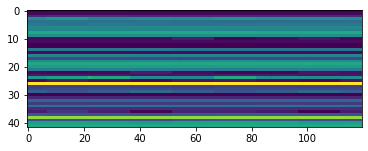

In [0]:
plt.imshow(Xt[10].T)

In [0]:
bach_test=generate_batch(batch_size=120, length = length,
                         end_index=model_train_period +60*24*30, 
                         start_index=model_train_period)
Xt,yt = next(bach_test)
Xt.shape, yt.shape, Xt[6,5:8,30:41]

((120, 120, 42),
 (120, 2),
 array([[0.00323588, 0.11049614, 0.33333334, 0.17871115, 0.3721921 ,
         0.125     , 0.03545475, 0.2171509 , 0.85047704, 0.21958622,
         0.56307435],
        [0.00323588, 0.11049614, 0.33333334, 0.17871115, 0.3721921 ,
         0.125     , 0.03545475, 0.2171509 , 0.85047704, 0.21958622,
         0.56307435],
        [0.00323588, 0.11049614, 0.33333334, 0.17871115, 0.3721921 ,
         0.125     , 0.03545475, 0.2171509 , 0.85047704, 0.21958622,
         0.56307435]], dtype=float32))

In [0]:
model_train_period

259200

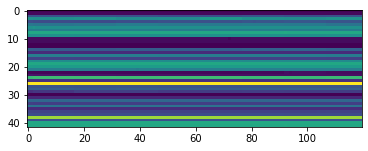

In [0]:
plt.imshow(Xt[16].T)

In [0]:
from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath = 'model_lstm_0_259200.best.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)

In [0]:
n_input=length
n_features=42
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
len(generator)

12960

In [0]:
# fit model
history = model.fit_generator(bach_train, steps_per_epoch=model_train_period//length, 
                              validation_data=bach_test, validation_steps=4,
                              epochs=5, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/5
2160/2160 [==============================] - 207s 96ms/step - loss: 7110530456786521.0000 - accuracy: 0.9981 - val_loss: 0.0116 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.01158, saving model to model_lstm_0_259200.best.hdf5
Epoch 2/5
2160/2160 [==============================] - 210s 97ms/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 0.0029 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.01158 to 0.00290, saving model to model_lstm_0_259200.best.hdf5
Epoch 3/5
2160/2160 [==============================] - 210s 97ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 8.9134e-04 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00290 to 0.00089, saving model to model_lstm_0_259200.best.hdf5
Epoch 4/5
2160/2160 [==============================] - 211s 98ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 4.0443e-04 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.00089 to 0.00040, saving model to model_lstm_0_25

In [0]:
history2 = model.fit_generator(bach_train, steps_per_epoch=model_train_period//length, 
                              validation_data=bach_test, validation_steps=10,
                              epochs=15, verbose=1, callbacks=[early_stopping, checkpointer, reduce_lr])

Epoch 1/15
2160/2160 [==============================] - 208s 96ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 2.1143e-04 - val_accuracy: 0.9992

Epoch 00001: val_loss improved from 0.00022 to 0.00021, saving model to model_lstm_0_259200.best.hdf5
Epoch 2/15
2160/2160 [==============================] - 211s 98ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 1.5224e-04 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.00021 to 0.00015, saving model to model_lstm_0_259200.best.hdf5
Epoch 3/15
2160/2160 [==============================] - 210s 97ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 1.8375e-04 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.00015
Epoch 4/15
2160/2160 [==============================] - 210s 97ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 1.6731e-04 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00015
Epoch 5/15
2160/2160 [==============================] - 207s 96ms/step - loss: 0.0018 

In [0]:
n_input=length
n_features=42
model_best = Sequential()
model_best.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_best.add(Dense(2, activation='softmax'))
model_best.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model_best.load_weights('model_lstm_0_259200.best.hdf5')

In [0]:
val_x, val_y = get_eval_batch(length = length, end_index=model_train_period+60*24*30, start_index=model_train_period)

43


MemoryError: 

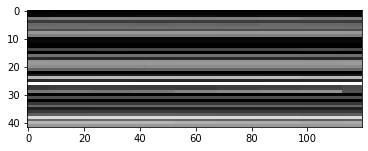

In [0]:
plt.imshow(val_x[50,:,:].T, cmap='gray')

In [0]:
df_all.iloc[model_train_period:].head(20)

,Timestamp,F28_PIC201_1_00A_STD1D,F28_PIC201_2_00A_STD1D,F28_TIC201_2_30A.CO,F28_TIC201_2_30A.PV,F28_TIC201_1_30A.CO,F28_TIC201_1_30A.PV,F28_PIT201_2_31A,F28_PIT201_2_20A,F28_SEL201_1_00A.OUT_x,...,LC12_PI650_0_04A,LC12_NY650_0_03A,LC12_NY650_0_03B,F28_SEL201_1_00A.OUT_y,label,lab_mv,start_label,legit,start_lable,alert
259200,2017-04-10 22:47:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.63792,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259201,2017-04-10 22:48:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259202,2017-04-10 22:49:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259203,2017-04-10 22:50:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259204,2017-04-10 22:51:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259205,2017-04-10 22:52:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259206,2017-04-10 22:53:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259207,2017-04-10 22:54:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259208,2017-04-10 22:55:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000
259209,2017-04-10 22:56:00,0.73780,0.71996,36.47645,54.98385,37.67205,55.01598,73.59306,76.37788,22.99946,...,1000.20203,20.41012,44.15864,-0.00543,0,0.00000,0,1,0,0.00000


In [0]:
pred_y = model_best.predict(val_x)

In [0]:
pred_yl = model.predict(val_x)
np.argmax(pred_yl, axis=1).sum()

AttributeError: 'numpy.ndarray' object has no attribute 'np'

In [0]:
pred_yl=np.argmax(pred_yl, axis=1)

In [0]:
pred_y=np.argmax(pred_y, axis=1)


In [0]:
pred_y.sum(), val_y[:,1].sum()

(0, 43.0)

In [0]:
y_shift[model_train_period:model_train_period+60*24*30].sum()

45

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y[:,1], pred_y)

array([[43201]], dtype=int64)

## predict and evaluate

## Test 3

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.utils import np_utils # from keras import utils as np_utils

data_dim = 42
timesteps = 360
num_classes = 2

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(60*24, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(60*24, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(60*24))  # return a single vector of dimension 32
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
#x_train = np.random.random((1000, timesteps, data_dim))
#y_train = np_utils.to_categorical(y_train, num_classes=2)

# Generate dummy validation data
#x_val = np.random.random((100, timesteps, data_dim))
#y_val = np.random.random((100, num_classes))

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 360, 1440)         8542080   
_________________________________________________________________
lstm_19 (LSTM)               (None, 360, 1440)         16594560  
_________________________________________________________________
lstm_20 (LSTM)               (None, 1440)              16594560  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2882      
Total params: 41,734,082
Trainable params: 41,734,082
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit_generator(bach_train, steps_per_epoch=40,
          epochs=5,
          validation_data=bach_test, validation_steps=4)

Epoch 1/5
40/40 [==============================] - 134s 3s/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
40/40 [==============================] - 133s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 132s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 130s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 132s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [0]:
pred=model.predict(bim)
pred.shape

(360, 2)

In [0]:
blb[:,0].sum()

360.0

In [0]:
pred

array([[1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379389e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379389e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379438e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379289e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379289e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379289e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379289e-14],
       [1.0000000e+00, 2.6379339e-14],
       [1.0000000e+00, 2.6379289e-14],
       [1.0000000e+00, 2.

In [0]:
score = model.evaluate(bim, blb, batch_size=36)
score

360/360 [==============================] - 10s 28ms/step


[0.0, 1.0]

In [0]:
from numpy import array
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# define generator
n_input = 2
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=1)
# number of samples
print('Samples: %d' % len(generator))
# print each sample
for i in range(len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

Samples: 8
[[1 2]] => [3]
[[2 3]] => [4]
[[3 4]] => [5]
[[4 5]] => [6]
[[5 6]] => [7]
[[6 7]] => [8]
[[7 8]] => [9]
[[8 9]] => [10]


In [0]:
# design network
model = Sequential()
model.add(LSTM(360, input_shape=(X_train.shape[1],)))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

ValueError: Input 0 is incompatible with layer lstm_3: expected ndim=3, found ndim=2

In [0]:
top_words = 5000
embedding_vecor_length = 32
max_review_length = 500
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


17465344/17464789 [==============================] - 3s 0us/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/3
25000/25000 [==============================] - 153s 6ms/step - loss: 0.5095 - accuracy: 0.7461
Epoch 2/3
25000/25000 [==============================] - 153s 6ms/step - loss: 0.3282 - accuracy: 0.8655
Epoch 3/3
25000/25000 [==============================] - 153s 6ms/step - loss: 0.2696 - accuracy:

In [0]:
model.fit(X_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(X_test, y_test, batch_size=16)

In [0]:
train_X.shape, train_X[:,-1].shape, y_train.shape

In [0]:
test_X.shape,y_test.shape

In [0]:
# fit network
history = model.fit(train_X, y_train, epochs=50, batch_size=72, 
                    validation_data=(test_X, y_test), verbose=1, shuffle=False)

In [0]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction

In [0]:
from sklearn import preprocessing

xdt = df_all[df_all.columns[1:-6]].values #returns a numpy array
sc = preprocessing.MinMaxScaler()
#Xdt = sc.fit_transform(xdt)
y=df_all['alert'].values

In [0]:
X = sc.fit_transform(xdt)

In [0]:
train_y.max()

In [0]:
y[y>0]=1
y=y.astype(int)

In [0]:
yt=np.where(y==1)
yt[0][0], yt[0][1], y[1055], y[4903]

In [0]:
ind=1055
mat_dat = X[ind-delta:ind, :]
plt.figure(figsize=(15,15))
plt.imshow(mat_dat.T, cmap='gray')

In [0]:
for i in range(5):
    ind = yt[0][i]
    mat_dat = X[ind-delta:ind, :]
    plt.imshow(mat_dat.T, cmap='gray')
    plt.show()

In [0]:
for i in [8000,60006,20000,80000]:
    #ind = yt[0][i]
    mat_dat = X[ind-delta:ind, :]
    plt.imshow(mat_dat.T, cmap='gray')
    plt.show()

In [0]:
delta=360

In [0]:
X.shape,1555023/4,y.shape

In [0]:
#X_train=X[600000]
#y_train=y[600000]
n_train=600000

In [0]:
def get_random_img_notalert(train=True):
    
    col = 'alert'
    dfs = df_all.iloc[0:n_train]
    if not train:
        dfs = df_all.iloc[n_train:]
    dfs = dfs[dfs[col]>0]
    ind=0
    find_good = False
    while not find_good:
        
        df_element = dfs.sample(n=1)
        if (df_element.iloc[0]['legit']>0):
            ind = df_element.index[0]
            find_good = True
    X_train=X[ind-int(delta):ind,:]
    y_train=y[ind]
    
    return X_train, y_train

In [0]:
def get_random_img_alert(train=True):
    
    col = 'alert'
    dfs = df_all.iloc[0:n_train]
    if not train:
        dfs = df_all.iloc[n_train:]
    dfs = dfs[dfs[col]>0]

        
    df_element = dfs.sample(n=1)
    ind = df_element.index[0]

    X_train=X[ind-int(delta):ind,:]
    y_train=y[ind]
    
    return X_train, y_train

In [0]:
X_train, y_train = get_random_img_notalert()
X_train.shape, y_train

In [0]:
plt.imshow(X_train.T)

In [0]:

    
from keras.utils import np_utils # from keras import utils as np_utils
IMG_SIZE=256
from sklearn.utils import shuffle

def generate_batch(batch_size=36, train=True):
    

    batch_images = np.zeros((batch_size, delta, 42, 3), np.float32)
    batch_lab = np.zeros((batch_size, 2), np.int8)   
    
    while True:
        # lab 3
        for i in range(batch_size//2):
            X_train, y_train = get_random_img_notalert(train)
            batch_images[i,:,:,0]=X_train
            batch_images[i,:,:,1]=X_train
            batch_images[i,:,:,2]=X_train
            batch_lab[i] = np_utils.to_categorical(y_train, num_classes=2)
            
        for i in range(batch_size//2, batch_size):
            X_train, y_train = get_random_img_notalert(train)
            batch_images[i,:,:,0]=X_train
            batch_images[i,:,:,1]=X_train
            batch_images[i,:,:,2]=X_train
            batch_lab[i] = np_utils.to_categorical(y_train, num_classes=2)
        
        yield shuffle(batch_images, batch_lab , random_state=0)

In [0]:
delta=360

In [0]:
np.random.rand(delta, 42, 3)

array([[[0.84870048, 0.22459117, 0.73449735],
        [0.69883289, 0.5992337 , 0.238207  ],
        [0.3847831 , 0.23664835, 0.12742396],
        ...,
        [0.03459852, 0.14276277, 0.58192178],
        [0.07582487, 0.71063452, 0.34796978],
        [0.90572256, 0.38710432, 0.53864848]],

       [[0.19744513, 0.34971851, 0.16969774],
        [0.30706969, 0.52719992, 0.12825482],
        [0.6737911 , 0.50580159, 0.2479626 ],
        ...,
        [0.67806926, 0.86995154, 0.96198319],
        [0.14331924, 0.99326044, 0.0258556 ],
        [0.21804022, 0.45202402, 0.85216955]],

       [[0.79566624, 0.65623968, 0.05307426],
        [0.30659279, 0.94668506, 0.28485546],
        [0.17049371, 0.11337096, 0.73536761],
        ...,
        [0.52065651, 0.56189663, 0.34327023],
        [0.74226616, 0.08851972, 0.34484561],
        [0.47656959, 0.48715474, 0.92286376]],

       ...,

       [[0.70047532, 0.28395786, 0.64753181],
        [0.62920177, 0.74836789, 0.65095743],
        [0.87743491, 0

In [0]:
def generate_batch_tst(batch_size=36, train=True):
    

    batch_images = np.random.rand(batch_size, delta, 42, 3)
    batch_lab = np.ones((batch_size, 2), np.int8)   
    
    while True:
 

        yield shuffle(batch_images, batch_lab )

In [0]:
bach_tst = generate_batch_tst(batch_size=36)
bim, blb = next(bach_tst)

In [0]:
bach_train = generate_batch(batch_size=36)
bim, blb = next(bach_train)

In [0]:
bim.shape

In [0]:
bach_test = generate_batch_tst(batch_size=128, train=False)
bimt, blbt = next(bach_test)

In [0]:
plt.imshow(bim[4])

In [0]:
import os
import json


import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.losses import binary_crossentropy
from keras.callbacks import Callback, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [0]:

from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization


In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

x = model_vgg16_conv.output

#Add the fully-connected layers 
x = Flatten(name='flatten')(x)
x = Dense(1028, activation='relu', name='fc1')(x)
x = Dense(1028, activation='relu', name='fc2')(x)
predictions = Dense(2, activation='sigmoid', name='predictions')(x)

model = Model(inputs=model_vgg16_conv.input, outputs=predictions)

In [0]:
x = model_vgg16_conv.output


import tensorflow as tf
config = tf.ConfigProto()
config

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
tf.keras.backend.set_session(tf.Session(config=config));

In [0]:
delta=360

In [0]:
#Create your own input format (here 3x200x200)
input = Input(shape=(delta,41,3),name = 'image_input')

#Use the generated model 
x = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(x)
x = Dense(1028, activation='relu', name='fc1')(x)
x = Dense(1028, activation='relu', name='fc2')(x)
x = Dense(2, activation='sigmoid', name='predictions')(x)

#Create your own model 
model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
model.summary()

In [0]:
#Create your own input format (here 3x200x200)
input = Input(shape=(delta,41,3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(1028, activation='relu', name='fc1')(x)
x = Dense(1028, activation='relu', name='fc2')(x)
x = Dense(2, activation='sigmoid', name='predictions')(x)

#Create your own model 
model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
model.summary()

In [0]:
vgg_model = VGG16(include_top=True, weights='imagenet')

# Disassemble layers
layers = [l for l in vgg_model.layers]

# Defining new convolutional layer.
# Important: the number of filters should be the same!
# Note: the receiptive field of two 3x3 convolutions is 5x5.
new_conv = Conv2D(filters=64, 
                  kernel_size=(5, 5),
                  name='new_conv',
                  padding='same')(layers[0].output)

# Now stack everything back
# Note: If you are going to fine tune the model, do not forget to
#       mark other layers as un-trainable
x = new_conv
for i in range(3, len(layers)):
    layers[i].trainable = False
    x = layers[i](x)

# Final touch
model = Model(input=layers[0].input, output=x)

In [0]:
vgg_model =VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(360, 41, 3))

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
model = Model(input=vgg_model.input, output=x)


In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

input = Input(shape=(delta,42,3),name = 'image_input')

#Use the generated model 
x = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(x)
x = Dense(1028, activation='relu', name='fc1')(x)
x = Dense(1028, activation='relu', name='fc2')(x)
predictions = Dense(2, activation='softmax', name='predictions')(x)

model = Model(inputs=input, outputs=predictions)

In [0]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_7/convolution}}]]
	 [[Mean_4/_275]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_7/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 12.1828 - accuracy: 0.1140 - val_loss: 13.3088 - val_accuracy: 0.1200
Epoch 2/5
1000/1000 [==============================] - 0s 402us/step - loss: 13.6767 - accuracy: 0.1050 - val_loss: 13.9004 - val_accuracy: 0.1200
Epoch 3/5
1000/1000 [==============================] - 0s 421us/step - loss: 14.0074 - accuracy: 0.1080 - val_loss: 14.0739 - val_accuracy: 0.0400
Epoch 4/5
1000/1000 [==============================] - 0s 400us/step - loss: 14.1385 - accuracy: 0.0890 - val_loss: 14.1759 - val_accuracy: 0.1300
Epoch 5/5
1000/1000 [==============================] - 0s 410us/step - loss: 14.2216 - accuracy: 0.0990 - val_loss: 14.2162 - val_accuracy: 0.1300


In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))

Train on 320 samples, validate on 96 samples
Epoch 1/5
320/320 [==============================] - 1s 2ms/step - loss: 12.0443 - accuracy: 0.1094 - val_loss: 12.7498 - val_accuracy: 0.0625
Epoch 2/5
320/320 [==============================] - 0s 676us/step - loss: 13.4340 - accuracy: 0.1156 - val_loss: 13.5154 - val_accuracy: 0.0625
Epoch 3/5
320/320 [==============================] - 0s 717us/step - loss: 14.0794 - accuracy: 0.1156 - val_loss: 13.9565 - val_accuracy: 0.0625
Epoch 4/5
320/320 [==============================] - 0s 667us/step - loss: 14.4583 - accuracy: 0.1156 - val_loss: 14.2118 - val_accuracy: 0.0625
Epoch 5/5
320/320 [==============================] - 0s 689us/step - loss: 14.6728 - accuracy: 0.1156 - val_loss: 14.3528 - val_accuracy: 0.0625


In [0]:
# For a single-input model with 10 classes (categorical classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 207us/step - loss: 2.3266 - accuracy: 0.1020
Epoch 2/10
1000/1000 [==============================] - 0s 64us/step - loss: 2.3025 - accuracy: 0.1210
Epoch 3/10
1000/1000 [==============================] - 0s 67us/step - loss: 2.2948 - accuracy: 0.1210
Epoch 4/10
1000/1000 [==============================] - 0s 63us/step - loss: 2.2837 - accuracy: 0.1280
Epoch 5/10
1000/1000 [==============================] - 0s 64us/step - loss: 2.2777 - accuracy: 0.1400
Epoch 6/10
1000/1000 [==============================] - 0s 63us/step - loss: 2.2704 - accuracy: 0.1570
Epoch 7/10
1000/1000 [==============================] - 0s 65us/step - loss: 2.2623 - accuracy: 0.1540
Epoch 8/10
1000/1000 [==============================] - 0s 66us/step - loss: 2.2547 - accuracy: 0.1660
Epoch 9/10
1000/1000 [==============================] - 0s 75us/step - loss: 2.2488 - accuracy: 0.1610
Epoch 10/10
1000/1000 [==============================] - 0s 64us/step - 

In [0]:
from keras import backend as K
from keras.layers import Input, MaxPooling2D, UpSampling2D, Conv2D, Conv2DTranspose
from keras.layers import concatenate
from keras.models import Model
from keras.optimizers import Adam
def get_unet(IMG_HEIGHT=None, IMG_WIDTH=None, IMG_CHANNELS=3, n_ch_output=2):
    # Build U-Net model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
    c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
    c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
    c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
    c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

    
    u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

    u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

    u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
    c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

    u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
    c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

  
    outputs = Conv2D(n_ch_output, (1, 1), activation='softmax')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model
model=get_unet()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, None, None, 8 224         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, None, None, 8 584         conv2d_60[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_24 (MaxPooling2D) (None, None, None, 8 0           conv2d_61[0][0]                  
____________________________________________________________________________________________

In [0]:
from keras.utils import np_utils # from keras import utils as np_utils
IMG_SIZE=256
from sklearn.utils import shuffle

def generate_batch_tst(batch_size=36):
    

    batch_images = np.random.rand(batch_size, IMG_SIZE, IMG_SIZE, 3)
    batch_masks = np.ones((batch_size,IMG_SIZE, IMG_SIZE,  2), np.int8)   
    
    while True:
                
        
        yield batch_images, batch_masks

In [0]:
bach_gen_tst = generate_batch_tst(batch_size=36)
bim, blb = next(bach_gen_tst)
bim.shape,blb.shape

((36, 256, 256, 3), (36, 256, 256, 2))

In [0]:
from keras.optimizers import Adam

learning_rate=0.001
model.compile(optimizer=Adam(lr=learning_rate),
                           loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [0]:
history=model.fit_generator(bach_gen_tst, steps_per_epoch=3)

Epoch 1/1


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_60/convolution}}]]
	 [[Mean_19/_2575]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_60/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_18/convolution}}]]
	 [[Mean_12/_925]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_18/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)
max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


ValueError: Error when checking input: expected embedding_1_input to have 2 dimensions, but got array with shape (100, 100, 100, 3)

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_14/convolution}}]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_14/convolution}}]]
	 [[Mean_6/_385]]
0 successful operations.
0 derived errors ignored.

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
#model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

inputx = Input(shape=(delta,42,3),name = 'image_input')

#Use the generated model 
#x = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(inputx)
x = Dense(1028, activation='relu', name='fc1')(x)
x = Dense(1028, activation='relu', name='fc2')(x)
predictions = Dense(2, activation='softmax', name='predictions')(x)

model = Model(inputs=input, outputs=predictions)

ValueError: Input tensors to a Model must come from `keras.layers.Input`. Received: <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x00000242946090C8>> (missing previous layer metadata).

In [0]:
from keras.optimizers import Adam
learning_rate=0.001
model.compile(optimizer=Adam(lr=learning_rate),
                           loss = 'categorical_crossentropy', 
                   metrics = [ 'accuracy'])

In [0]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [0]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [0]:
history=model.fit_generator(bach_tst, steps_per_epoch=10,
                        #validation_data=bach_test,validation_steps=20,
                            epochs = 1, verbose=1)

Epoch 1/1


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_4/convolution}}]]
	 [[Mean_3/_183]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_4/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [0]:
from keras import Model
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization

early_stopping = EarlyStopping(monitor='val_loss', patience=9)
checkpointer = ModelCheckpoint(filepath = 'model_vgg.best.hdf5',verbose=1,
                               save_best_only=True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.000001, verbose=1)

In [0]:
X.shape, y.shape

X_train=X[600000,:]
y_train=y[600000]

history=model.fit(x=X_train, y=y_train, batch_size=32,#steps_per_epoch=X_train.shape[0]//30,
                        #validation_data=bach_test,validation_steps=20,
                            epochs = 1, verbose=1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(360,41,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [0]:
bach_train = generate_batch_tst(batch_size=3)
bim, blb = next(bach_train)
bim.shape, blb.shape

In [0]:
bach_test = generate_batch_tst(batch_size=128, train=False)
bimt, blbt = next(bach_test)

In [0]:
plt.imshow(bim[0])

In [0]:
bim.min(),bim.max(),bim.dtype

In [0]:
import tensorflow as tf
with tf.device('/gpu:0'):
      a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
      b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
      c = tf.matmul(a, b)
with tf.Session() as sess:
    print (sess.run(c))

In [0]:
history=model.fit_generator(bach_tst, steps_per_epoch=10,
                        #validation_data=bach_test,validation_steps=20,
                            epochs = 1, verbose=1)

In [0]:
df_all.columns

In [0]:
365/4

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from dateutil.parser import parse
col='LC12_TI650_0_03A'
# Additive Decomposition
result_add = seasonal_decompose(df_all[col], model='additive',freq=60*24*7*4,extrapolate_trend=0)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from dateutil.parser import parse
col='LC12_TI650_0_03A'
# Additive Decomposition
result_add = seasonal_decompose(df_all[col].abs(), model='multiplicative',freq=60*24*7*4,extrapolate_trend=0)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [0]:
df['moving_avg'] = df[col].rolling(60).mean()

In [0]:
ax = df[['F28_SEL201_1_00A.OUT',  'moving_avg']].iloc[1440000:1480000:].plot(figsize=(15,5))
ax.axhline(y=df['F28_SEL201_1_00A.OUT'].mean() - 3*df['F28_SEL201_1_00A.OUT'].std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=2)
ax.axhline(y=df['F28_SEL201_1_00A.OUT'].mean() + 3*df['F28_SEL201_1_00A.OUT'].std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=2)

In [0]:
# Additive Decomposition
result_add = seasonal_decompose(df.iloc[200:]['moving_avg'], model='additive',freq=60*24*7,extrapolate_trend=0)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [0]:
df['label'].value_counts()

In [0]:
df_all['label'] = df['label']

In [0]:
ax = df[['F28_SEL201_1_00A.OUT', 'label']].plot(figsize=(15,5))
ax.axhline(y=df['F28_SEL201_1_00A.OUT'].mean() - 3*df['F28_SEL201_1_00A.OUT'].std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=2)
ax.axhline(y=df['F28_SEL201_1_00A.OUT'].mean() + 3*df['F28_SEL201_1_00A.OUT'].std(),
           xmin=0, xmax=1, color='r', linestyle='--', lw=2)

* 10/12/2016 10:47:44 PM	

In [0]:
df['time'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %I:%M:%S %p')
df.head()

In [0]:
df['m'] = df['time'].dt.month

In [0]:
df['month'] = df['time'].dt.floor('d') - pd.offsets.MonthBegin(1)
df.head(10)

In [0]:


df['23']=23
df['std']=df['F28_SEL201_1_00A.OUT'].std()
df[['F28_SEL201_1_00A.OUT', '23']].plot(figsize=(15,5))
plt.title('F28_SEL201_1_00A.OUT')
plt.show()

In [0]:
df[col].describe()

In [0]:
df.describe()

In [0]:
df.loc[df['F28_SEL201_1_00A.OUT']>26]=26.

In [0]:
plt.figure(figsize=(15,5))

df['F28_SEL201_1_00A.OUT'].plot(rot=45)
plt.title('F28_PIC201_1_00A_STD1D')
plt.show()

In [0]:
df19.plot()